<a href="https://colab.research.google.com/github/lewisjustin749/Classification-Modeling/blob/main/Classification_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This jupyter notebook is prepared by "Justin Lewis".

# 1. Load Data and perform basic EDA 
<hr>
<ol type="I">
  <li>import libraries: pandas, numpy, matplotlib (set %matplotlib inline), matplotlib’s pyplot, seaborn, missingno, scipy’s stats, sklearn (1 pt) </li>
  <li>import the data to a dataframe and show the count of rows and columns (1 pt)</li>
  <li>Show the top 5 and last 5 rows (1 pt)</li>
  <li>Show how many columns have null values</li>
  <li>Plot the count of target and discuss its imbalances and probably issues and solutions</li>
</ol>

In [ ]:
#=======================================================================================
# Importing the libaries:
#=======================================================================================

from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

Saving hrdata2.csv to hrdata2.csv


In [ ]:
#=======================================================================================
# Importing the data:
#=======================================================================================
def read_data():
  data = pd.read_csv('hrdata2.csv')
  print("csv file imported successfully")
  print("-"*50)
  return data

In [ ]:
df = read_data()

csv file imported successfully
--------------------------------------------------


 Discovering the data:

In [ ]:
df.head()

Unnamed: 0  enrollee_id      city  city_development_index gender  \
0           1        29725   city_40                   0.776   Male   
1           4          666  city_162                   0.767   Male   
2           7          402   city_46                   0.762   Male   
3           8        27107  city_103                   0.920   Male   
4          11        23853  city_103                   0.920   Male   

       relevent_experience enrolled_university education_level  \
0   No relevent experience       no_enrollment        Graduate   
1  Has relevent experience       no_enrollment         Masters   
2  Has relevent experience       no_enrollment        Graduate   
3  Has relevent experience       no_enrollment        Graduate   
4  Has relevent experience       no_enrollment        Graduate   

  major_discipline  experience company_size    company_type last_new_job  \
0             STEM        15.0        50-99         Pvt Ltd           >4   
1             STEM        21.0        50-99  Funded Startup            4   
2             STEM        13.0          <10         Pvt Ltd           >4   
3             STEM         7.0        50-99         Pvt Ltd            1   
4             STEM         5.0    5000-9999         Pvt Ltd            1   

   training_hours  target  
0              47     0.0  
1               8     0.0  
2              18     1.0  
3              46     1.0  
4             108     0.0

In [ ]:
df.tail()

Unnamed: 0  enrollee_id      city  city_development_index  gender  \
8950       19147        21319   city_21                   0.624    Male   
8951       19149          251  city_103                   0.920    Male   
8952       19150        32313  city_160                   0.920  Female   
8953       19152        29754  city_103                   0.920  Female   
8954       19155        24576  city_103                   0.920    Male   

          relevent_experience enrolled_university education_level  \
8950   No relevent experience    Full time course        Graduate   
8951  Has relevent experience       no_enrollment         Masters   
8952  Has relevent experience       no_enrollment        Graduate   
8953  Has relevent experience       no_enrollment        Graduate   
8954  Has relevent experience       no_enrollment        Graduate   

     major_discipline  experience company_size    company_type last_new_job  \
8950             STEM         1.0      100-500         Pvt Ltd            1   
8951             STEM         9.0        50-99         Pvt Ltd            1   
8952             STEM        10.0      100-500   Public Sector            3   
8953       Humanities         7.0        10/49  Funded Startup            1   
8954             STEM        21.0        50-99         Pvt Ltd            4   

      training_hours  target  
8950              52     1.0  
8951              36     1.0  
8952              23     0.0  
8953              25     0.0  
8954              44     0.0

In [ ]:
#=======================================================================================
# Discovering the features:
#=======================================================================================
print(df.columns.values)

['Unnamed: 0' 'enrollee_id' 'city' 'city_development_index' 'gender'
 'relevent_experience' 'enrolled_university' 'education_level'
 'major_discipline' 'experience' 'company_size' 'company_type'
 'last_new_job' 'training_hours' 'target']


In [ ]:
#=======================================================================================
# Discovering the features types:
#=======================================================================================
df.info()
print('-'*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8955 entries, 0 to 8954
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              8955 non-null   int64  
 1   enrollee_id             8955 non-null   int64  
 2   city                    8955 non-null   object 
 3   city_development_index  8955 non-null   float64
 4   gender                  8955 non-null   object 
 5   relevent_experience     8955 non-null   object 
 6   enrolled_university     8955 non-null   object 
 7   education_level         8955 non-null   object 
 8   major_discipline        8955 non-null   object 
 9   experience              8955 non-null   float64
 10  company_size            8955 non-null   object 
 11  company_type            8955 non-null   object 
 12  last_new_job            8955 non-null   object 
 13  training_hours          8955 non-null   int64  
 14  target                  8955 non-null   

In [ ]:
# Unnecessary feature 
df.drop('Unnamed: 0', inplace=True, axis=1)

In [ ]:
print("data shape = ", df.shape)

data shape =  (8955, 14)


In [ ]:
#=======================================================================================
# Null value Analysis:
#=======================================================================================
print('Missing data in csv file')
print(df.isnull().sum())


Missing data in csv file
enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64


In [ ]:
#=======================================================================================
# Discovering the numerical data distribution :
#=======================================================================================
df.describe()

enrollee_id  city_development_index   experience  training_hours  \
count   8955.000000             8955.000000  8955.000000     8955.000000   
mean   16869.638749                0.844570    11.635623       65.074930   
std     9963.804718                0.116178     6.545796       60.235087   
min        2.000000                0.448000     0.000000        1.000000   
25%     8150.000000                0.794000     6.000000       23.000000   
50%    16924.000000                0.910000    10.000000       47.000000   
75%    25902.000000                0.920000    18.000000       88.000000   
max    33380.000000                0.949000    21.000000      336.000000   

            target  
count  8955.000000  
mean      0.165606  
std       0.371747  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

Insights:
* More than 50% of candidates  in the training program live in a developed city with an metric > 9
* 16.56% of candidates are looking to switch jobs after training.
* Training hours feature has right skewness
* Average candidate has about 11 and a half years of total experience in data science.

In [ ]:
#=======================================================================================
# Discovering the categorical data distribution :
#=======================================================================================
df.describe(include = ["O"])

city gender      relevent_experience enrolled_university  \
count       8955   8955                     8955                8955   
unique       116      3                        2                   3   
top     city_103   Male  Has relevent experience       no_enrollment   
freq        2426   8073                     7851                7594   

       education_level major_discipline company_size company_type last_new_job  
count             8955             8955         8955         8955         8955  
unique               3                6            8            6            6  
top           Graduate             STEM        50-99      Pvt Ltd            1  
freq              6252             7989         1986         6794         3838

Insights:
*   90.2% of the candidates are males
*   87.7% of candidates have relevant experience in data science

*   84.8% of canidates were not enrolled in university before going through training
*   More than half of the Candidates graduted College (68.8%)


*  89.2% of candidates have studied a STEM major in university
*  About 75% candidates worked in a Pvt Ltd





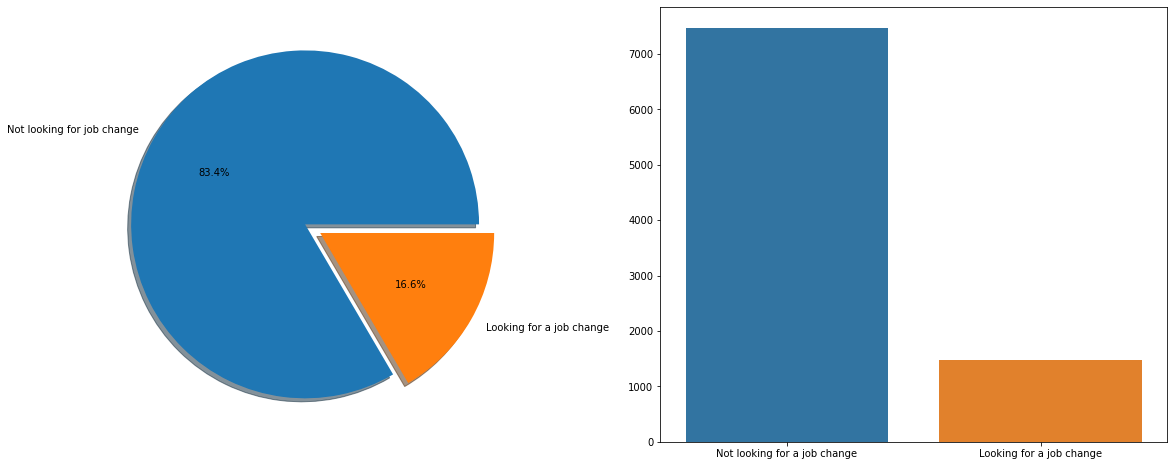

In [ ]:
# ===================================================================
# Count of people who changed jobs:
# ===================================================================
f,ax=plt.subplots(1,2,figsize=(20,8))
df['target'].replace({0:'Not looking for job change', 1:'Looking for a job change'}).value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_ylabel('')
sns.countplot(x=  df["target"].replace({0:'Not looking for a job change', 1:'Looking for a job change'}), ax= ax[1])
ax[1].set_ylabel('')
ax[1].set_xlabel('')
plt.show()

### Plot the count of target and discuss its imbalances and probably issues and solutions
*   After plotting the count of target it is clear that the target column is heavily skewed towards zero - people not looking for jobs. Possbile problems are mainly due to how well the other features are correlated to the target being 0 rather than 1 Possible solutions are removing some features or adding features that correlate better with the target to be 1. We need to dig down more to get better insights from the data and see which features influenced a candidate to switch jobs.


*  We saw before that only 1483 (16%) of the Candidates wanted a job change after going through training.

*  The data being skewed towards zero relates to the fact candidates invest a lot of training hours and also has revelant and many years of experience in data science so leaving a data science company after receiving training is highly unlikely 

In [ ]:
# Helper functions:
# Bar plot that plots a feature against the target (changing jobs)
# table that displays a feature's mean value (percentage) of changing jobs
# Stacked histplot that plots count of a feature against the target (changing jobs)

def changed_jobs_bar_plot(feature):
  plt.figure(figsize=(10,10))
  sns.barplot(data = df, x = feature, y = "target").set_title(f"{feature} VS Changing jobs")
  plt.show()
def changed_jobs_table(feature):
  return df[[feature, "target"]].groupby([feature], as_index = False).mean().sort_values(by="target", ascending=False).style.background_gradient(low=0.75,high=1)
def changed_jobs_hist_plot(feature):
  plt.figure(figsize=(10,10))
  sns.histplot(data = df, x = feature, hue = "target", binwidth = 5, 
               palette = sns.color_palette(["red", "blue"]), multiple = "stack").set_title(f"{feature} VS target")
  plt.show()

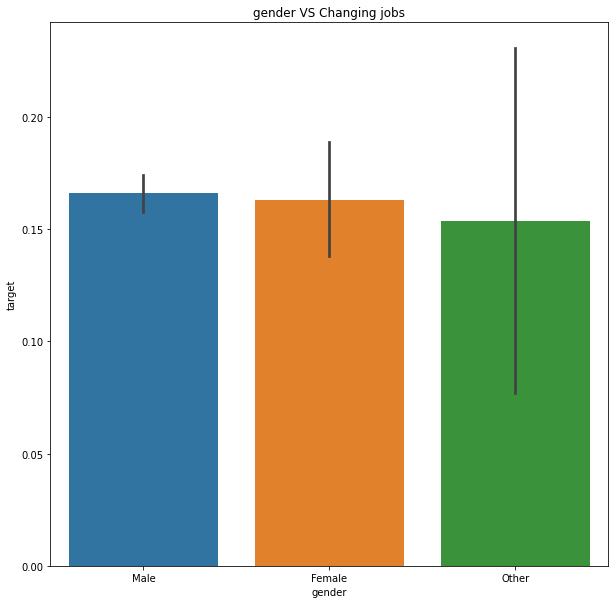

In [ ]:
changed_jobs_bar_plot("gender")

In [ ]:
changed_jobs_table("gender")

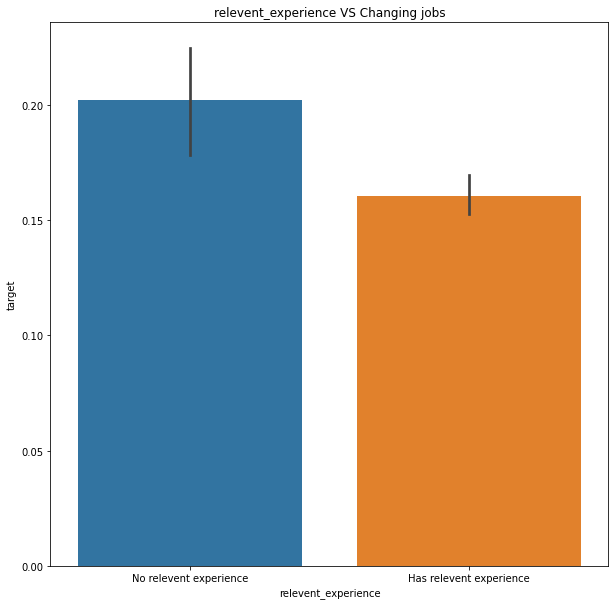

In [ ]:
changed_jobs_bar_plot("relevent_experience")

In [ ]:
changed_jobs_table("relevent_experience")

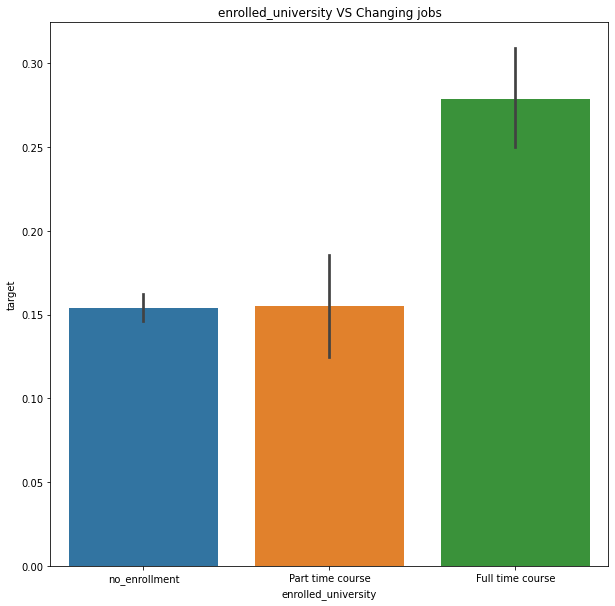

In [ ]:
changed_jobs_bar_plot("enrolled_university")

In [ ]:
changed_jobs_table('enrolled_university')

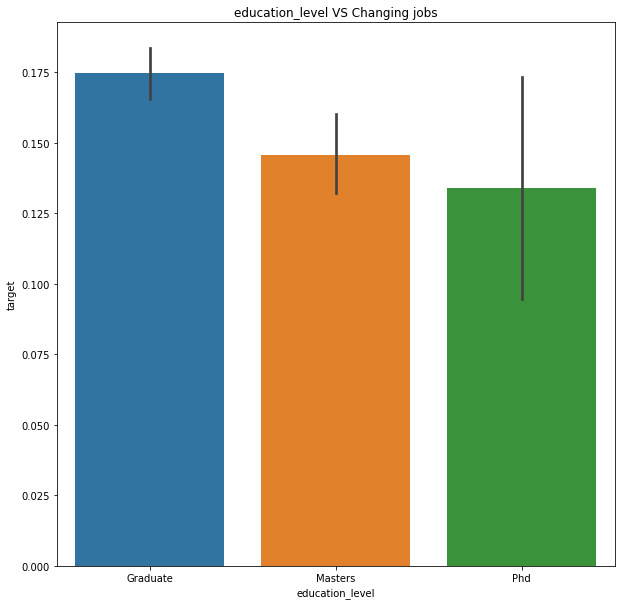

In [ ]:
changed_jobs_bar_plot("education_level")

In [ ]:
changed_jobs_table('education_level')

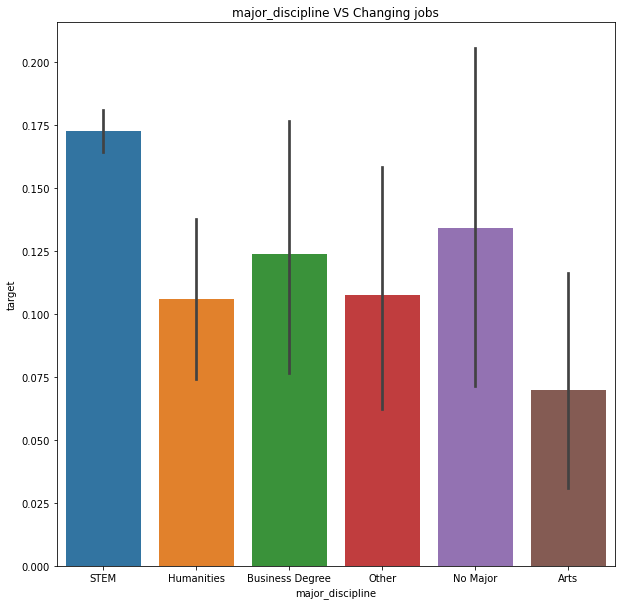

In [ ]:
changed_jobs_bar_plot("major_discipline")

In [ ]:
changed_jobs_table('major_discipline')

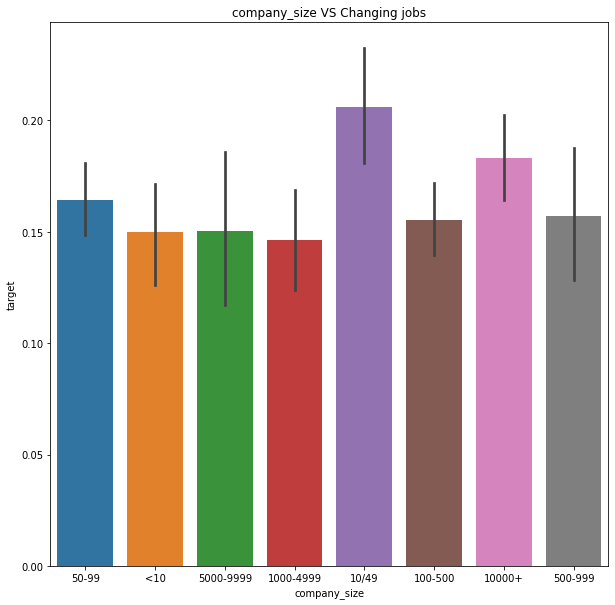

In [ ]:
changed_jobs_bar_plot('company_size')

In [ ]:
changed_jobs_table('company_size')

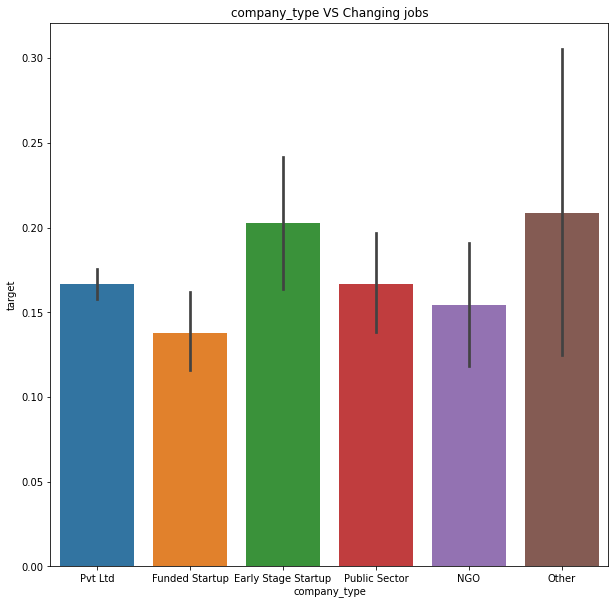

In [ ]:
changed_jobs_bar_plot('company_type')

In [ ]:
changed_jobs_table('company_type')

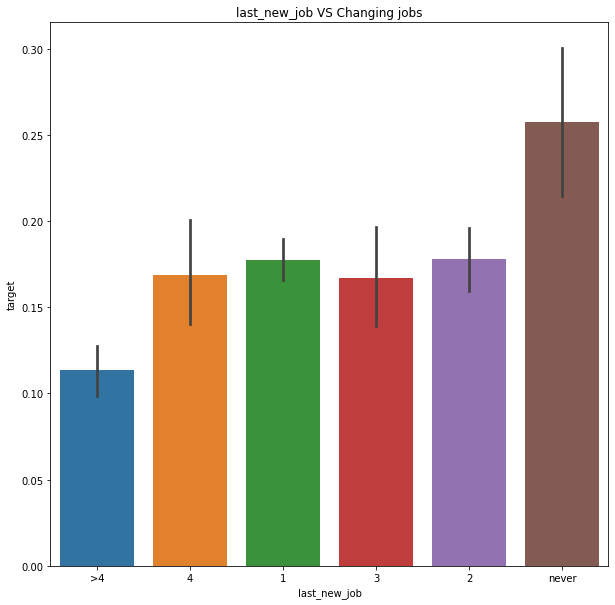

In [ ]:
changed_jobs_bar_plot('last_new_job')

In [ ]:
changed_jobs_table('last_new_job')

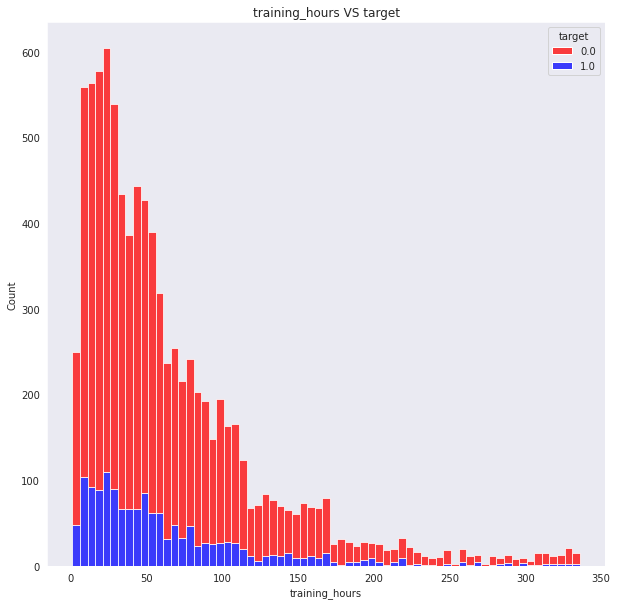

In [ ]:
sns.set_style("dark") # to remove the grid.
changed_jobs_hist_plot("training_hours") # Note: This plot is stack plot.

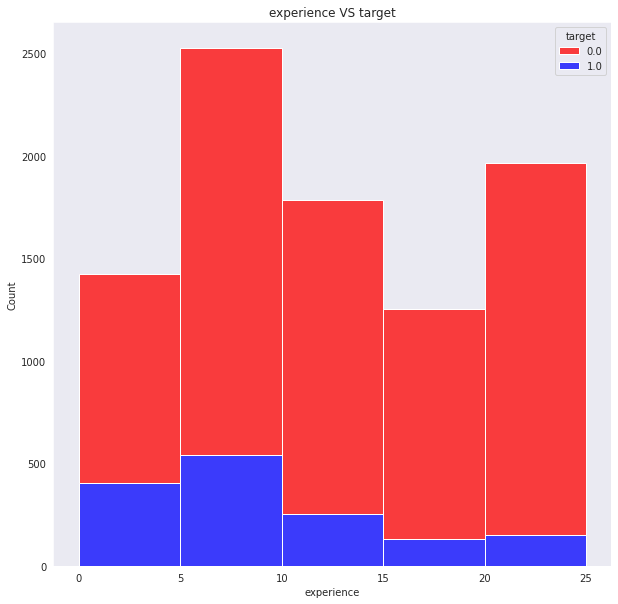

In [ ]:
sns.set_style("dark") # to remove the grid.
changed_jobs_hist_plot("experience") # Note: This plot is stack plot.

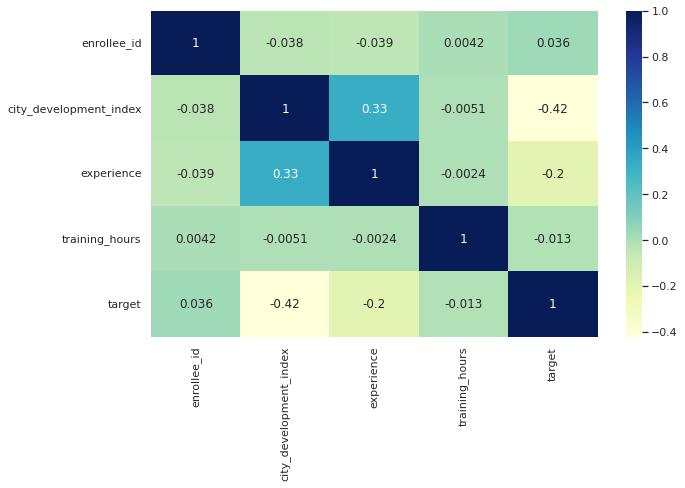

In [ ]:
#=======================================================================================
# Discovering the correlations:
#=======================================================================================

sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'YlGnBu')

* Enrollee Id has no correlation with any feature.
* Experience has correlation with city development.
* Overall there is little positive or negative correlation between features.
* Strong negative correlation between changing jobs (target) and city development.

Text(0.5, 1.0, 'Other')

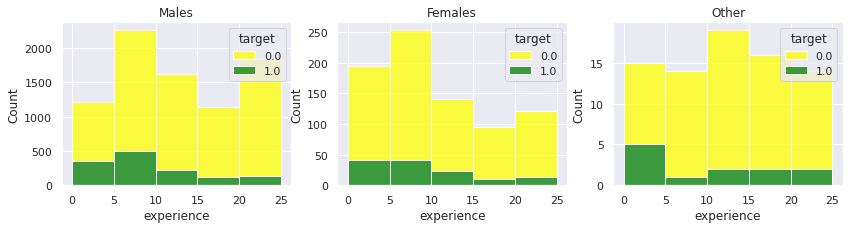

In [ ]:
plot , ax = plt.subplots(1 , 3 , figsize=(14,3))
sns.histplot(data = df.loc[df["gender"]=="Male"] , x = "experience" , hue = "target",binwidth=5,ax = ax[0],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("Males")
sns.histplot(data = df.loc[df["gender"]=="Female"] , x = "experience" , hue = "target",binwidth=5,ax = ax[1],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("Females")
sns.histplot(data = df.loc[df["gender"]=="Other"] , x = "experience" , hue = "target",binwidth=5,ax = ax[2],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("Other")



*   Typically people with under 10 years of experience are more likely to change jobs after training regardless of gender.
*   Males and other gender are more likely to change jobs.



# 2. Feature Selection and Pre-processing 
<hr>
<ol type="I">
  <li>Preprocessing City:</li>
  <ol type="I">
  <li>Plot #of records per city so that the highest city counts are shown in descending order</li>
  <li>How many rows belong to the top 4 cities in total and how many for the remaining?</li>
  <li>Replace the city name with <b><i>city_others</i></b> if the city name is not within the top 4 city names. This <a href="https://stackoverflow.com/questions/31128477/how-to-set-values-based-on-a-list-in-pandas-python">link</a> might help you. (Also, converting the list to a set and then doing a set difference might help you as well)</li>
  <li>Show some sample data that the records have changed appropriately</li>
  </ol>
  <li>Education Level:</li>
  <ol type="I">
  <li>Show the unique values of education level.</li>
  <li>Replace the value of Education level column like ordinal values, "Graduate" -> 0, Masters->1, and Phd -> 2 (writing a function with the condition and return values and using apply with the data frame can help you to achieve this.)</li>
  <li>Show some sample data that the records have changed appropriately</li>
  </ol>
  <li>company_size column:</li>
  <ol type="I">
  <li>Show the unique values of the company_size column</li>
  <li>Change the values of the company_size column from 0 to 7 where e0 is < 10 and 7 is 10000z. The order of the numbers should be based on the values of the column-like an ordinary variable. (writing a function with the condition and return values and using apply with the data frame can help you to achieve this.)</li>
  <li>Show the updated unique values</li>
  </ol>
  <li>Last_new_job:</li>
  <ol type="I">
  <li>Show the unique values of the last_new_job column</li>
  <li>Convert the values of this column to never->0, 1->1,....>4 -->5</li>
  <li>Show the updated values</li>
  </ol>
  <li>Other columns:</li>
  <ol type="I">
  <li>Show the unique values of company_type, major_descipline, enrolled_university, relevant_experience, gender, and updated city column</li>
  <li>As one-hot encoding is a bit strict, use panda's get_dummies function to create binary columns for the values of the following columns:</li>
  <ol type="I">
  <li>company_tye</li>
  <li>major_descipline</li>
  <li>enrolled_university</li>
  <li>relevant_eperience</li>
  <li>gender</li>
  <li>updated city column</li>
  </ol></ol>
  <li>Show the top 5 and last 5 rows to show that the table has changed [You must set this first before showing the data frame as many columns will be hidden due to the large number of columns:
pd.set_option('display.max_columns', None)
Also, show the shape of the table
Drop the enrollee_id and any duplicate columns (if you have multiple city column one with actual and one with updated, then remove the actual one)</li>
  <li>Feature Scaling:</li>
  <ol type="I">
  <li>Use sklearn.preprocessing's MinMaxScaler to perform min max scaling to all the columns (see documentation on how to use it)</li>
  <li>Show sample records that show some the scaled records</li>
  </ol>
  <li>Move the target column to the last column of the data frame and show that it has changed</li>


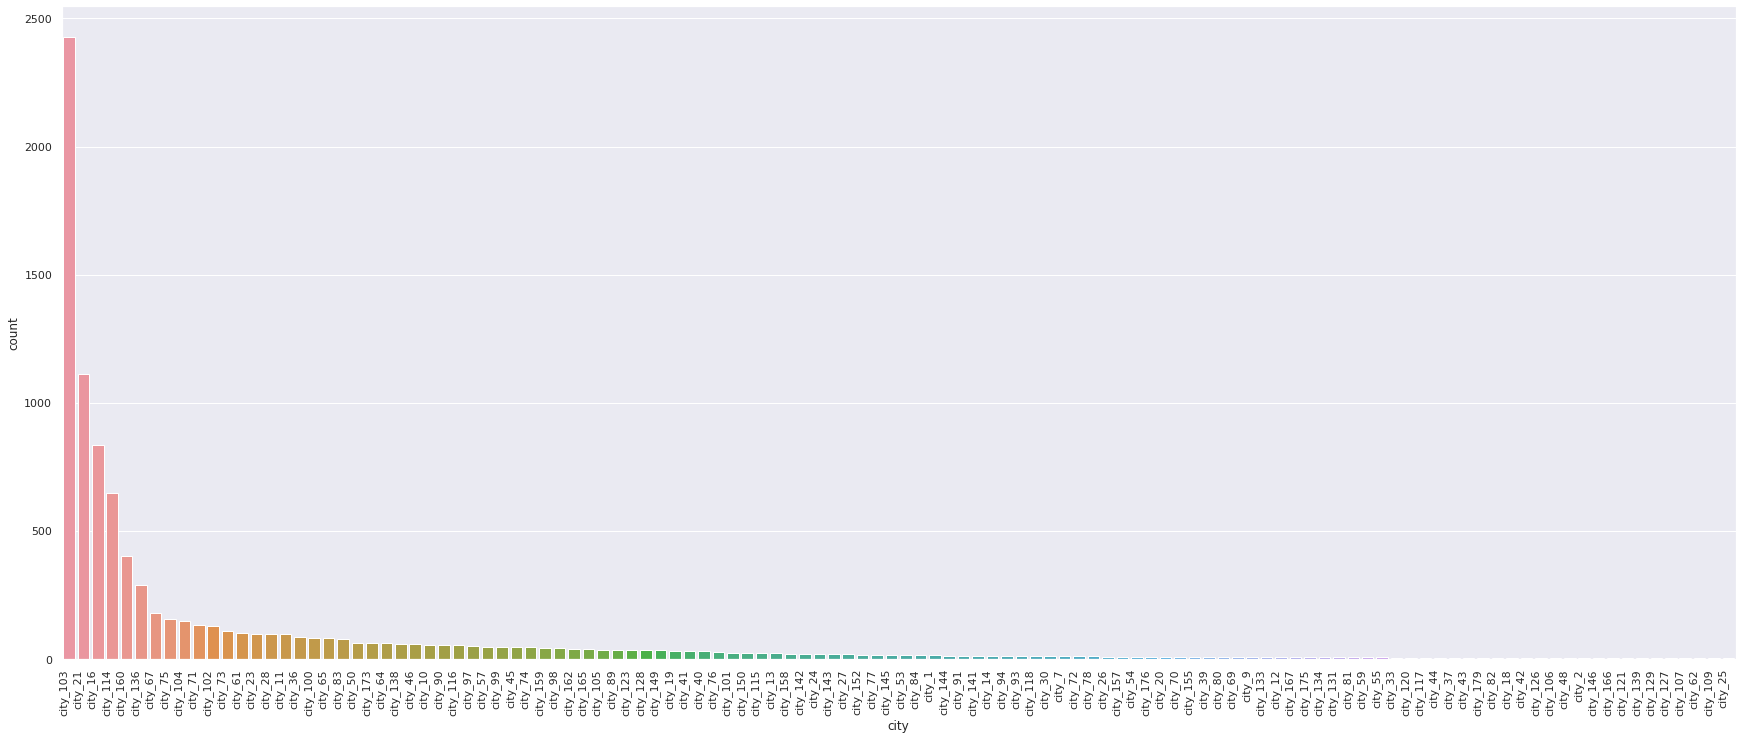

In [ ]:
plt.figure(figsize = (30,12))
ax = sns.countplot(x="city", data=df, order = df['city'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right');

In [ ]:
sum_city = df['city'].value_counts()
sum_city.sort_values(inplace = True, ascending = False)
sum_city

city_103    2426
city_21     1111
city_16      836
city_114     648
city_160     401
            ... 
city_127       1
city_107       1
city_62        1
city_109       1
city_25        1
Name: city, Length: 116, dtype: int64

### How many rows belong to the top 4 cities in total and how many for the remaining?
Approximately 5021 rows belong in the top 4 citites. There are 3934 rows remaining outside thr top 4 cities

In [ ]:
# combining cities outside top 4 into one city column in dataframe 

some_list = ['city_103','city_21', 'city_16', 'city_114']
df.loc[-df['city'].isin(some_list), 'city'] = 'city_other'

In [ ]:
sum_new_city = df['city'].value_counts()
sum_new_city.sort_values(inplace = True, ascending = False)
sum_new_city

city_other    3934
city_103      2426
city_21       1111
city_16        836
city_114       648
Name: city, dtype: int64

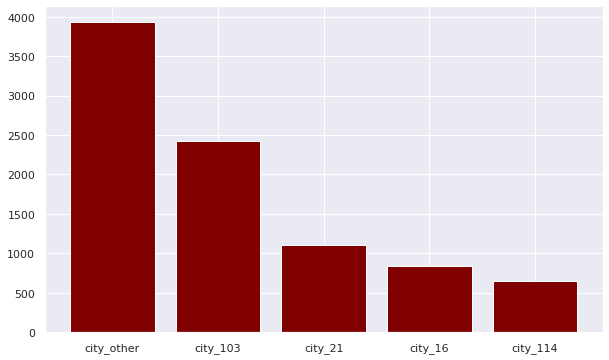

In [ ]:
#Plot count of top 4 citites and the rest of the cities combined
plt.bar(sum_new_city.index, sum_new_city.values, color ='maroon');

In [ ]:
# Unique values of education level 

print(df['education_level'].unique())
print()
print(df['education_level'].value_counts().unique())
print()
df['education_level'].value_counts()


['Graduate' 'Masters' 'Phd']

[6252 2449  254]



Graduate    6252
Masters     2449
Phd          254
Name: education_level, dtype: int64

In [ ]:
# Converting education level to Nominal values
# "Graduate" -> 0, Masters-> 1, and Phd -> 2

df.education_level = df.education_level.astype('category')
df.education_level = df.education_level.cat.reorder_categories(['Graduate','Masters','Phd'])
df.education_level = df.education_level.cat.codes

df['education_level'].value_counts()

0    6252
1    2449
2     254
Name: education_level, dtype: int64

In [ ]:
# Unique values of company size 

print(df['company_size'].unique())
print()
print(df['company_size'].value_counts().unique())
print()
df['company_size'].value_counts()

['50-99' '<10' '5000-9999' '1000-4999' '10/49' '100-500' '10000+'
 '500-999']

[1986 1814 1449  951  930  840  592  393]



50-99        1986
100-500      1814
10000+       1449
10/49         951
1000-4999     930
<10           840
500-999       592
5000-9999     393
Name: company_size, dtype: int64

In [ ]:
# Converting company size to Nominal values
# "<10" -> 0, 10-49-> 1, 50-99 -> 2, 100-500 -> 3, 500-999 -> 4, 1000-4999 -> 5, 5000-9999 -> 6, 10000+ -> 7"

df.company_size = df.company_size.astype('category')
df.company_size = df.company_size.cat.reorder_categories(['<10', '10/49', '50-99','100-500','500-999','1000-4999','5000-9999','10000+'])
df.company_size = df.company_size.cat.codes

df['company_size'].value_counts().sort_index()

0     840
1     951
2    1986
3    1814
4     592
5     930
6     393
7    1449
Name: company_size, dtype: int64

In [ ]:
# Unique values of last new job 

print(df['last_new_job'].unique())
print()
print(df['last_new_job'].value_counts().unique())
print()
print(df['last_new_job'].value_counts().sort_index())

['>4' '4' '1' '3' '2' 'never']

[3838 1965 1570  610  599  373]

1        3838
2        1570
3         610
4         599
>4       1965
never     373
Name: last_new_job, dtype: int64


In [ ]:
# Converting last new job to Nominal values
# "never -> 0, 1 -> 1, 2 -> 2, 3 -> 3, 4 -> 4, >4 -> 5"

df.last_new_job = df.last_new_job.astype('category')
df.last_new_job = df.last_new_job.cat.reorder_categories(['never','1', '2', '3','4','>4'])
df.last_new_job = df.last_new_job.cat.codes

df['last_new_job'].value_counts().sort_index()

0     373
1    3838
2    1570
3     610
4     599
5    1965
Name: last_new_job, dtype: int64

In [ ]:
# Unique values of company type 

print(df['company_type'].unique())
print()
print(df['company_type'].value_counts())

['Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Public Sector' 'NGO'
 'Other']

Pvt Ltd                6794
Funded Startup          784
Public Sector           564
Early Stage Startup     385
NGO                     356
Other                    72
Name: company_type, dtype: int64


In [ ]:
# Unique values of major discipline 

print(df['major_discipline'].unique())
print()
print(df['major_discipline'].value_counts())


['STEM' 'Humanities' 'Business Degree' 'Other' 'No Major' 'Arts']

STEM               7989
Humanities          378
Other               177
Business Degree     170
Arts                129
No Major            112
Name: major_discipline, dtype: int64


In [ ]:
# Unique values of enrolled university

print(df['enrolled_university'].unique())
print()
print(df['enrolled_university'].value_counts())

['no_enrollment' 'Part time course' 'Full time course']

no_enrollment       7594
Full time course     832
Part time course     529
Name: enrolled_university, dtype: int64


In [ ]:
# Unique values of relevent experience

print(df['relevent_experience'].unique())
print()
print(df['relevent_experience'].value_counts())

['No relevent experience' 'Has relevent experience']

Has relevent experience    7851
No relevent experience     1104
Name: relevent_experience, dtype: int64


In [ ]:
# Unique values of gender

print(df['gender'].unique())
print()
print(df['gender'].value_counts())

['Male' 'Female' 'Other']

Male      8073
Female     804
Other       78
Name: gender, dtype: int64


In [ ]:
# Unique values of city

print(df['city'].unique())
print()
print(df['city'].value_counts())

['city_other' 'city_103' 'city_114' 'city_21' 'city_16']

city_other    3934
city_103      2426
city_21       1111
city_16        836
city_114       648
Name: city, dtype: int64


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# one-hot encoding on categorical data
df = pd.get_dummies(df,columns=['company_type', 'major_discipline', 'enrolled_university', 'relevent_experience', 'gender', 'city'])

In [ ]:
df.head()

enrollee_id  city_development_index  education_level  experience  \
0        29725                   0.776                0        15.0   
1          666                   0.767                1        21.0   
2          402                   0.762                0        13.0   
3        27107                   0.920                0         7.0   
4        23853                   0.920                0         5.0   

   company_size  last_new_job  training_hours  target  \
0             2             5              47     0.0   
1             2             4               8     0.0   
2             0             5              18     1.0   
3             2             1              46     1.0   
4             6             1             108     0.0   

   company_type_Early Stage Startup  company_type_Funded Startup  \
0                                 0                            0   
1                                 0                            1   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   company_type_NGO  company_type_Other  company_type_Public Sector  \
0                 0                   0                           0   
1                 0                   0                           0   
2                 0                   0                           0   
3                 0                   0                           0   
4                 0                   0                           0   

   company_type_Pvt Ltd  major_discipline_Arts  \
0                     1                      0   
1                     0                      0   
2                     1                      0   
3                     1                      0   
4                     1                      0   

   major_discipline_Business Degree  major_discipline_Humanities  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   major_discipline_No Major  major_discipline_Other  major_discipline_STEM  \
0                          0                       0                      1   
1                          0                       0                      1   
2                          0                       0                      1   
3                          0                       0                      1   
4                          0                       0                      1   

   enrolled_university_Full time course  enrolled_university_Part time course  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     0                                     0   
4                                     0                                     0   

   enrolled_university_no_enrollment  \
0                                  1   
1                                  1   
2                                  1   
3                                  1   
4                                  1   

   relevent_experience_Has relevent experience  \
0                                            0   
1                                            1   
2                                            1   
3                                            1   
4                                            1   

   relevent_experience_No relevent experience  gender_Female  gender_Male  \
0                                           1              0            1   
1                            

In [ ]:
df.tail()

enrollee_id  city_development_index  education_level  experience  \
8950        21319                   0.624                0         1.0   
8951          251                   0.920                1         9.0   
8952        32313                   0.920                0        10.0   
8953        29754                   0.920                0         7.0   
8954        24576                   0.920                0        21.0   

      company_size  last_new_job  training_hours  target  \
8950             3             1              52     1.0   
8951             2             1              36     1.0   
8952             3             3              23     0.0   
8953             1             1              25     0.0   
8954             2             4              44     0.0   

      company_type_Early Stage Startup  company_type_Funded Startup  \
8950                                 0                            0   
8951                                 0                            0   
8952                                 0                            0   
8953                                 0                            1   
8954                                 0                            0   

      company_type_NGO  company_type_Other  company_type_Public Sector  \
8950                 0                   0                           0   
8951                 0                   0                           0   
8952                 0                   0                           1   
8953                 0                   0                           0   
8954                 0                   0                           0   

      company_type_Pvt Ltd  major_discipline_Arts  \
8950                     1                      0   
8951                     1                      0   
8952                     0                      0   
8953                     0                      0   
8954                     1                      0   

      major_discipline_Business Degree  major_discipline_Humanities  \
8950                                 0                            0   
8951                                 0                            0   
8952                                 0                            0   
8953                                 0                            1   
8954                                 0                            0   

      major_discipline_No Major  major_discipline_Other  \
8950                          0                       0   
8951                          0                       0   
8952                          0                       0   
8953                          0                       0   
8954                          0                       0   

      major_discipline_STEM  enrolled_university_Full time course  \
8950                      1                                     1   
8951                      1                                     0   
8952                      1                                     0   
8953                      0                                     0   
8954                      1                                     0   

      enrolled_university_Part time course  enrolled_university_no_enrollment  \
8950                                     0                                  0   
8951                                     0                                  1   
8952                                     0                                  1   
8953                                     0                                  1   
8954                                     0                                  1   

      relevent_experience_Has relevent experience  \
8950                                            0   
8951                                            1   
8952                                            1   
8953                                            1   
8954                                            1   

      

In [ ]:
df.shape

(8955, 33)

In [ ]:
# drop unnecessary column
df.drop(['enrollee_id'], inplace=True, axis=1)

In [ ]:
df.head()

city_development_index  education_level  experience  company_size  \
0                   0.776                0        15.0             2   
1                   0.767                1        21.0             2   
2                   0.762                0        13.0             0   
3                   0.920                0         7.0             2   
4                   0.920                0         5.0             6   

   last_new_job  training_hours  target  company_type_Early Stage Startup  \
0             5              47     0.0                                 0   
1             4               8     0.0                                 0   
2             5              18     1.0                                 0   
3             1              46     1.0                                 0   
4             1             108     0.0                                 0   

   company_type_Funded Startup  company_type_NGO  company_type_Other  \
0                            0                 0                   0   
1                            1                 0                   0   
2                            0                 0                   0   
3                            0                 0                   0   
4                            0                 0                   0   

   company_type_Public Sector  company_type_Pvt Ltd  major_discipline_Arts  \
0                           0                     1                      0   
1                           0                     0                      0   
2                           0                     1                      0   
3                           0                     1                      0   
4                           0                     1                      0   

   major_discipline_Business Degree  major_discipline_Humanities  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   major_discipline_No Major  major_discipline_Other  major_discipline_STEM  \
0                          0                       0                      1   
1                          0                       0                      1   
2                          0                       0                      1   
3                          0                       0                      1   
4                          0                       0                      1   

   enrolled_university_Full time course  enrolled_university_Part time course  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     0                                     0   
4                                     0                                     0   

   enrolled_university_no_enrollment  \
0                                  1   
1                                  1   
2                                  1   
3                                  1   
4                                  1   

   relevent_experience_Has relevent experience  \
0                                            0   
1                                            1   
2                                            1   
3                                            1   
4                                            1   

   relevent_experience_No relevent experience  gender_Female  gender_Male  \
0                                           1              0            1   
1                                           0              0            1   
2                                           0              0 

In [ ]:
# Feature Scaling on the dataframe 

scaler = MinMaxScaler()

In [ ]:
scaled_data = scaler.fit_transform(df)

In [ ]:
scaled_df = pd.DataFrame(data = scaled_data, columns = df.columns)

In [ ]:
scaled_df

city_development_index  education_level  experience  company_size  \
0                   0.654691              0.0    0.714286      0.285714   
1                   0.636727              0.5    1.000000      0.285714   
2                   0.626747              0.0    0.619048      0.000000   
3                   0.942116              0.0    0.333333      0.285714   
4                   0.942116              0.0    0.238095      0.857143   
...                      ...              ...         ...           ...   
8950                0.351297              0.0    0.047619      0.428571   
8951                0.942116              0.5    0.428571      0.285714   
8952                0.942116              0.0    0.476190      0.428571   
8953                0.942116              0.0    0.333333      0.142857   
8954                0.942116              0.0    1.000000      0.285714   

      last_new_job  training_hours  target  company_type_Early Stage Startup  \
0              1.0        0.137313     0.0                               0.0   
1              0.8        0.020896     0.0                               0.0   
2              1.0        0.050746     1.0                               0.0   
3              0.2        0.134328     1.0                               0.0   
4              0.2        0.319403     0.0                               0.0   
...            ...             ...     ...                               ...   
8950           0.2        0.152239     1.0                               0.0   
8951           0.2        0.104478     1.0                               0.0   
8952           0.6        0.065672     0.0                               0.0   
8953           0.2        0.071642     0.0                               0.0   
8954           0.8        0.128358     0.0                               0.0   

      company_type_Funded Startup  company_type_NGO  company_type_Other  \
0                             0.0               0.0                 0.0   
1                             1.0               0.0                 0.0   
2                             0.0               0.0                 0.0   
3                             0.0               0.0                 0.0   
4                             0.0               0.0                 0.0   
...                           ...               ...                 ...   
8950                          0.0               0.0                 0.0   
8951                          0.0               0.0                 0.0   
8952                          0.0               0.0                 0.0   
8953                          1.0               0.0                 0.0   
8954                          0.0               0.0                 0.0   

      company_type_Public Sector  company_type_Pvt Ltd  major_discipline_Arts  \
0                            0.0                   1.0                    0.0   
1                            0.0                   0.0                    0.0   
2                            0.0                   1.0                    0.0   
3                            0.0                   1.0                    0.0   
4                            0.0                   1.0                    0.0   
...                          ...                   ...                    ...   
8950                         0.0                   1.0                    0.0   
8951                         0.0                   1.0                    0.0   
8952                         1.0                   0.0                    0.0   
8953                         0.0                   0.0                    0.0   
8954                         0.0                   1.0                    0.0   

      major_discipline_Business Degree  major_discipline_Humanities  \
0                                  0.0                          0.0   
1                                  0.0                          0.0   
2                                  0.0                   

In [ ]:
# move column "target" to 1st position
shiftPos = scaled_df.pop("target")

# insert column on the last position
scaled_df.insert(31, "target", shiftPos)

In [ ]:
scaled_df.head()

city_development_index  education_level  experience  company_size  \
0                0.654691              0.0    0.714286      0.285714   
1                0.636727              0.5    1.000000      0.285714   
2                0.626747              0.0    0.619048      0.000000   
3                0.942116              0.0    0.333333      0.285714   
4                0.942116              0.0    0.238095      0.857143   

   last_new_job  training_hours  company_type_Early Stage Startup  \
0           1.0        0.137313                               0.0   
1           0.8        0.020896                               0.0   
2           1.0        0.050746                               0.0   
3           0.2        0.134328                               0.0   
4           0.2        0.319403                               0.0   

   company_type_Funded Startup  company_type_NGO  company_type_Other  \
0                          0.0               0.0                 0.0   
1                          1.0               0.0                 0.0   
2                          0.0               0.0                 0.0   
3                          0.0               0.0                 0.0   
4                          0.0               0.0                 0.0   

   company_type_Public Sector  company_type_Pvt Ltd  major_discipline_Arts  \
0                         0.0                   1.0                    0.0   
1                         0.0                   0.0                    0.0   
2                         0.0                   1.0                    0.0   
3                         0.0                   1.0                    0.0   
4                         0.0                   1.0                    0.0   

   major_discipline_Business Degree  major_discipline_Humanities  \
0                               0.0                          0.0   
1                               0.0                          0.0   
2                               0.0                          0.0   
3                               0.0                          0.0   
4                               0.0                          0.0   

   major_discipline_No Major  major_discipline_Other  major_discipline_STEM  \
0                        0.0                     0.0                    1.0   
1                        0.0                     0.0                    1.0   
2                        0.0                     0.0                    1.0   
3                        0.0                     0.0                    1.0   
4                        0.0                     0.0                    1.0   

   enrolled_university_Full time course  enrolled_university_Part time course  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   
3                                   0.0                                   0.0   
4                                   0.0                                   0.0   

   enrolled_university_no_enrollment  \
0                                1.0   
1                                1.0   
2                                1.0   
3                                1.0   
4                                1.0   

   relevent_experience_Has relevent experience  \
0                                          0.0   
1                                          1.0   
2                                          1.0   
3                                          1.0   
4                                          1.0   

   relevent_experience_No relevent experience  gender_Female  gender_Male  \
0                                         1.0            0.0          1.0   
1                                         0.0            0.0          1.0   
2                                         0.0            0.0          1.0   
3                               

# 3. X/Y and Training/Test Split with stratified sampling and SMOTE
<hr>
<ol type="I">
  <li>Copy all the features into X and the target to Y</li>
  <li>Show the ratio of 1 and 0 in Y</li>
  <li>Use sklearn's train_test_split to split the data set into training and test sets. There should be 30% records in the test set. The random_stat should be 0. As we want to have the same ratio of 0 and 1 in the test set, use the stratify parameter to the Y.</li>
  <li>Show the ratio of 0 and 1 in y_train and then y_test</li>
  <li>Rebalance:</li>
  <ol type="I">
  <li> Use imblearn's SMOTE to balance the x_train (<a href="https://imbalanced-learn.org/stable/over_sampling.html">Help Link</a>)  (section 2.1.2)</li>
  </ol>
  <li>Show the ratio of 0 and 1 in Y_train after rebalancing. (do you have 50% of each class now?)</li>
</ol>

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [ ]:
# ==================================================================================
# Preparing Data For Training:
# ==================================================================================

#inserting features into X
# inserting target into y: 1 - Looking for a job change, 0 - Not looking for job change

X = np.array(scaled_df[['city_development_index',	'education_level',	'experience',	'company_size',	'last_new_job',	'training_hours',	'company_type_Early Stage Startup',	'company_type_Funded Startup',	'company_type_NGO',	'company_type_Other',	'company_type_Public Sector',	'company_type_Pvt Ltd',	'major_discipline_Arts', 'major_discipline_Business Degree',	'major_discipline_Humanities',	'major_discipline_No Major',	'major_discipline_Other',	'major_discipline_STEM',	'enrolled_university_Full time course',	'enrolled_university_Part time course',	'enrolled_university_no_enrollment',	'relevent_experience_Has relevent experience',	'relevent_experience_No relevent experience',	'gender_Female',	'gender_Male',	'gender_Other',	'city_city_103',	'city_city_114',	'city_city_16',	'city_city_21',	'city_city_other']])
y = np.array(scaled_df['target']);

In [ ]:
# Ratio of 1s and 0s in Y 

oneCount = 0;
zeroCount = 0;
length = len(y);
for i in range(length):
        if (y[i] == 1):
            oneCount += 1;
        elif(y[i] == 0):
            zeroCount += 1;

print(f"Ratio of ones and zeros for y is {oneCount} : {zeroCount}")

Ratio of ones and zeros for y is 1483 : 7472


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0, stratify = y)

In [ ]:
# Ratio of 1s and 0s in Y train

oneCount_y_train = 0;
zeroCount_y_train = 0;
length_y_train = len(y_train);
for i in range(length_y_train):
        if (y_train[i] == 1):
            oneCount_y_train += 1;
        elif(y_train[i] == 0):
            zeroCount_y_train += 1;
print(f"Ratio of ones and zeros for y_train is {oneCount_y_train} : {zeroCount_y_train}")

Ratio of ones and zeros for y_train is 1038 : 5230


In [ ]:
# Ratio of 1s and 0s in Y test

oneCount_y_test = 0;
zeroCount_y_test = 0;
length_y_test = len(y_test);
for i in range(length_y_test):
        if (y_test[i] == 1):
            oneCount_y_test += 1;
        elif(y_test[i] == 0):
            zeroCount_y_test += 1;
print(f"Ratio of ones and zeros for y_test is {oneCount_y_test} : {zeroCount_y_test}")

Ratio of ones and zeros for y_test is 445 : 2242


In [ ]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [ ]:
# Ratio of 1s and 0s in Y resampled (balanced data set)

oneCount_y_resampled = 0;
zeroCount_y_resampled = 0;
length_y_resampled = len(y_resampled);
for i in range(length_y_resampled):
        if (y_resampled[i] == 1):
            oneCount_y_resampled += 1;
        elif(y_resampled[i] == 0):
            zeroCount_y_resampled += 1;
print(f"Ratio of ones and zeros for y_resampled is {oneCount_y_resampled} : {zeroCount_y_resampled}")

Ratio of ones and zeros for y_resampled is 5230 : 5230


In [ ]:
# Cross validate model with Kfold stratified cross val
kfold_ = StratifiedKFold(n_splits=10)

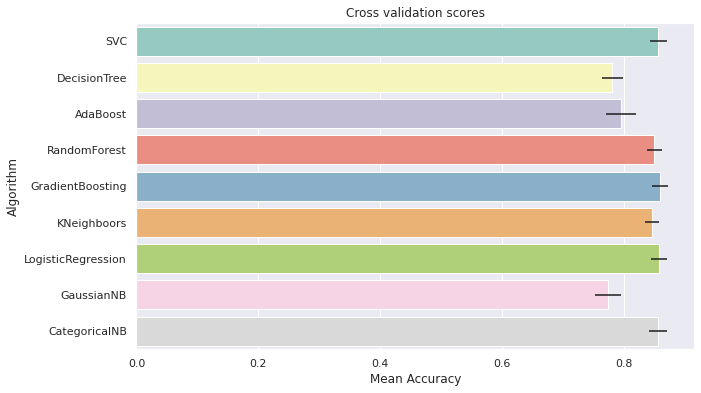

In [ ]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(GaussianNB())
classifiers.append(CategoricalNB())


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold_, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","GradientBoosting","KNeighboors","LogisticRegression", "GaussianNB", "CategoricalNB"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

#4. PCA and Logistic Regression
<hr>
<ol type="I">
  <li>As we have many features now, we would like to do principal component analysis (you have learned it in datacamp). As part of ti, create pipeline to find how many dimensions give you the best logistic regression model. You can follow <a href="https://machinelearningmastery.com/principal-components-analysis-for-dimensionality-reduction-in-python/">this link</a> (consider using the code right before the plot). But you need to use our balanced training set in this experiment. Also, number of features should be based on how many maximum features do we have so far. This question should produce a plot and based on that you need to decide how many features would you like to use.</li>
  <li>Based on the number of features chosen in the above step, use the test set to evaluate the model for accuracy (the code right after the plot can give you an idea about it.). Use sklearn.metrics import accuracy_score for accuracy (the google colab link in the classification module should help with it)</li>
  <li>Show the confusion matrix and interpret the numbers in the confusion matrix (the google colab link in the classification module should help with it)</li>
  <li>Show precision, recall, and f1 score ((the google colab link in the classification module should help with it)). Note that all of these scores should be calculated based on the test set and predicted result for the test set</li>
  <li>Plot ROC curve and find AUC (the same google colab link should help you)</li>
  <li>Plot precision-recall curve for different thresholds and discuss the plot</li>
</ol>



In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,32):
		steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
		models[str(i)] = Pipeline(steps=steps)
	return models

In [ ]:
# evaluate a given model using cross-validation
def evaluate_model(model, X_resampled, y_resampled):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
	scores = cross_val_score(model, X_resampled, y_resampled, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

>1 0.681 (0.017)
>2 0.693 (0.017)
>3 0.694 (0.017)
>4 0.696 (0.017)
>5 0.703 (0.015)
>6 0.703 (0.015)
>7 0.706 (0.015)
>8 0.719 (0.013)
>9 0.721 (0.014)
>10 0.729 (0.014)
>11 0.728 (0.013)
>12 0.728 (0.014)
>13 0.725 (0.013)
>14 0.726 (0.013)
>15 0.726 (0.012)
>16 0.726 (0.014)
>17 0.725 (0.013)
>18 0.726 (0.012)
>19 0.726 (0.012)
>20 0.731 (0.012)
>21 0.732 (0.012)
>22 0.732 (0.012)
>23 0.732 (0.012)
>24 0.732 (0.012)
>25 0.731 (0.012)
>26 0.731 (0.012)
>27 0.731 (0.012)
>28 0.731 (0.012)
>29 0.731 (0.012)
>30 0.731 (0.012)
>31 0.731 (0.012)


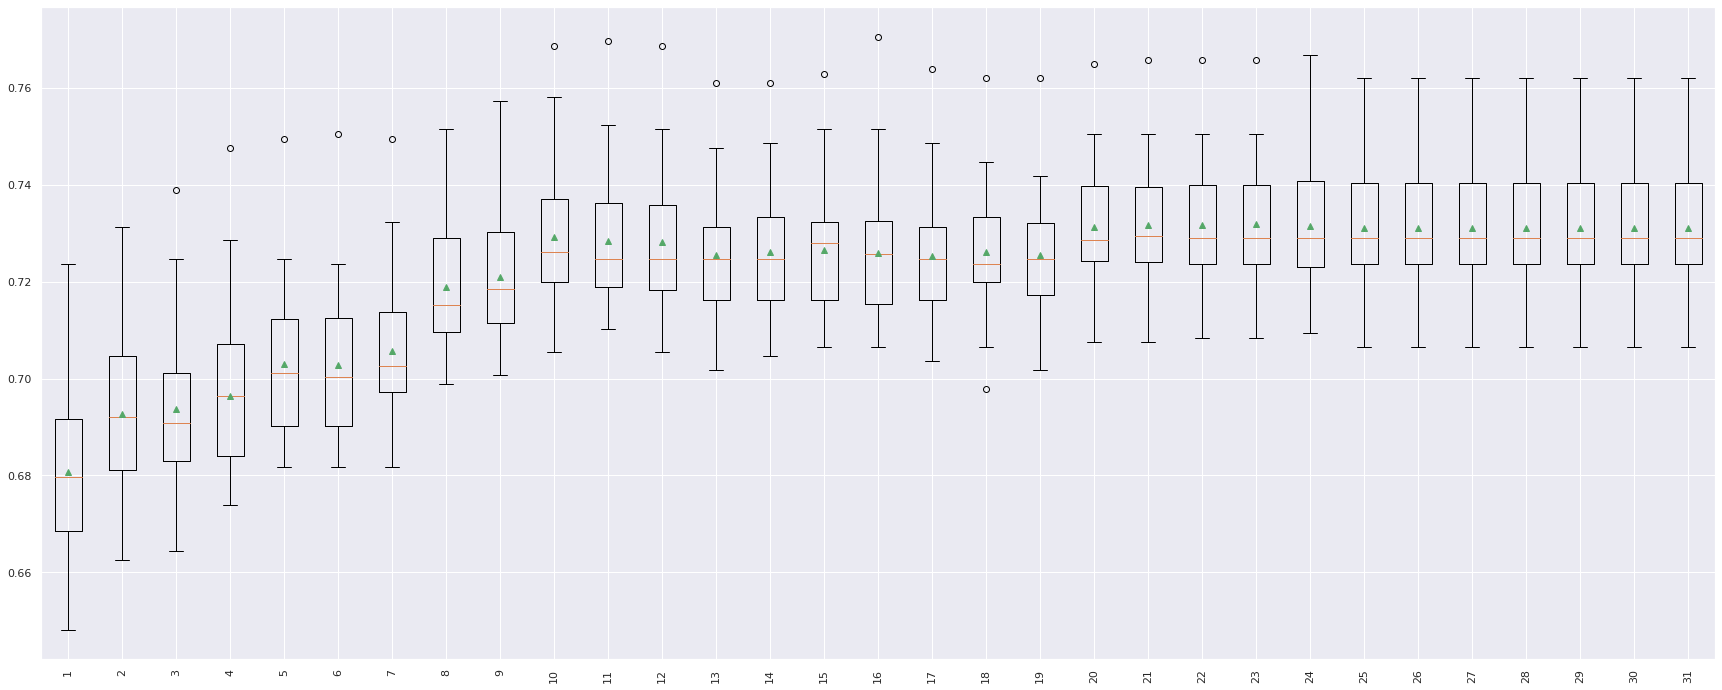

In [ ]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_resampled, y_resampled)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.figure(figsize = (30,12))
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# define the model and fit the data
steps_t = [('pca', PCA(n_components=15)), ('m', LogisticRegression())]
model_t = Pipeline(steps=steps_t)
model_t.fit(X_resampled, y_resampled);
test_predictions = model_t.predict(X_test)

In [ ]:
# fraction of correctly classified labels

print(f'Logistic Regression Accuracy Score (balanced data): {accuracy_score(y_test, test_predictions):.2f}')

Logistic Regression Accuracy Score (balanced data): 0.82


*  Model can accuratley predict 82% of the test data.

In [ ]:
# In this model let the negative class be 0 : Not looking for a job change

# And positive class be 1 :  looking for a job change

#                                      Predicted
#  CM displays as               Negative     Positive
#                    Negative     TN            FP
#       Actual       Positive     FN            TP


cm = confusion_matrix(y_test, test_predictions)
print(f'Logistic Regression Confusion Matrix (balanced data)\n\n{cm}')

Logistic Regression Confusion Matrix (balanced data)

[[1957  285]
 [ 190  255]]


###Show the confusion matrix and interpret the numbers in the confusion matrix
* Based off the confusion matrix, We can see that a majority of the time the model can correctly predict that a person is not looking of a job (1973 TN). About seven percent of the time the model predicts that someone is not looking for a job change but they actually are (194 FN). 
* There are more false positives than true positives meaning the model predicts that people are looking for job changes when they actually are not more than people who are actually looking for job change.
* Model mainly makes negative predictions over positive meaning it mainly predicts that someone is not looking for a job change after receiving training.

In [ ]:
# Calculate Precision, Recall, and F1 Scores
precision = precision_score(y_test, test_predictions)
print(f'Logistic Regression Precision Score (balanced data): {precision:.2f}')

f1 = f1_score(y_test, test_predictions)
print(f'Logistic Regression F1 Score (balanced data): {f1:.2f}')

recall = recall_score(y_test, test_predictions)
print(f'Logistic Regression Recall Score (balanced data): {recall:.2f}')


Logistic Regression Precision Score (balanced data): 0.47
Logistic Regression F1 Score (balanced data): 0.52
Logistic Regression Recall Score (balanced data): 0.57


* The low precision score is due to the fact there are more FP than TP, so majority of time a prediction of wanting a job change is actually not wanting a job change 

In [ ]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(model_t, X_resampled, y_resampled, cv=3, method="decision_function")

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_resampled, y_scores)

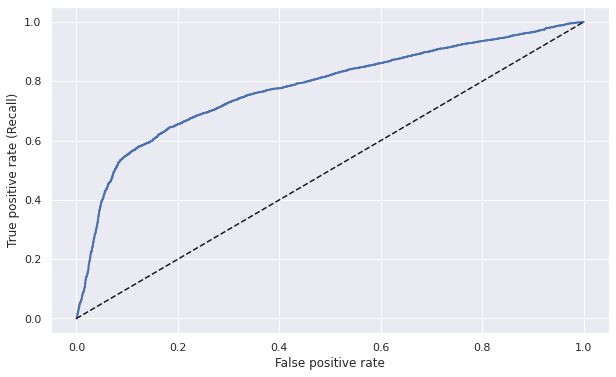

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 
plot_roc_curve(fpr, tpr)

plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
print(f'Area under curve for Logistic Regression (balanced data): {roc_auc_score(y_resampled, y_scores):.2f}')

Area under curve for Logistic Regression (balanced data): 0.78


In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_resampled, y_scores)

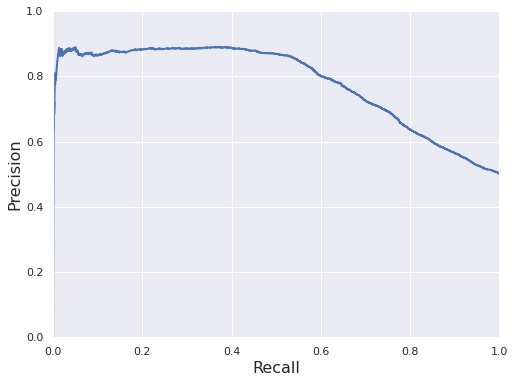

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)

plt.show()

* Recall begins to drop sharply at 60% recall. So using a recall of about 55% is optimial 

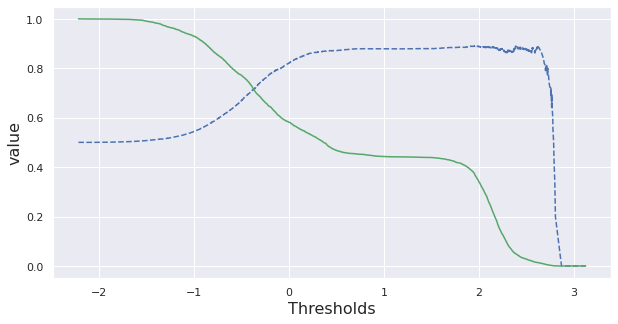

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 plt.xlabel("Thresholds", fontsize=16)
 plt.ylabel("value", fontsize=16)

plt.figure(figsize=(10,5))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()
#dotted line precision, solid line recall

###Plot precision-recall curve for different thresholds and discuss the plot
Based off the plot, we can see at lower thresholds the recall is high, so there there is a higher chance of predicted positives are actually positive, and then progressively gets lower as the thresholds increase until it hits 0. For precision, we can see that the precision increases to its maximum around threshold zero then plateaus until it reaches the max threshold, where the value drops to zero.   

# 5. Softmaxt regression:
<hr>
1.   How softmax regression is related to logistic regression? What library can you use for softmax regression?

Softmax regression is a generalization of logistic regression to the case where we want to handle multiple classes. Softmax Regressioncan be used with TensorFlow.

# 6. KNN (you will need to use grid search for parameter optimization)
<hr>

  1.  Helpful links:

    *   <a href="https://www.youtube.com/watch?v=h3ARWw3uSoE">Video 1</a>
    *   <a href="https://www.youtube.com/watch?v=TvB_3jVIHhg">Video 2</a>
  
  2. The descriptoin of this part will be provided later

  3. Use sklearn's KNN classifier to train (with k=  10) and predict the model based on the unbalanced training set and test it and show the confusion matrix and classification report

4. Use sklearn's KNN classifier to train (with k=  10) and predict the model based on the rebalanced training set and test it and show the confusion matrix and classification report

5. Use grid search to tune the following hyperparameters of KNN: number of neighbors (between 1 and 20), weights  (uniform or distance), and metrics (Euclidean, Manhattan, or Minkowski)istance) to use for KNN. While creating an instance of GridSearchCV, use multiple evaluation metrics such as AUC and accuracy based on the example available at Link to sklearn (Links to an external site.). Also some helpful links and codes: https://github.com/oguzhankir/Hyperparameter_Tuning/tree/main/Knn_tuning (Links to an external site.)  and
https://www.youtube.com/watch?v=TvB_3jVIHhg

6.The above grid search process can take a couple of minutes. After completing the process, print the best_params_


7.Based on the result from grid search, use the parameters to train a model, test it with test set, and then print the confusion matrix and classification report. Also, show the AUC of ROC.

8.Use PCA and based on that train model, test it and then print the confusion matrix and classification report. Also, show the AUC of ROC.

9.A short discussion on the 4 models and their differences.

In [ ]:
# Define KNN model with 10 neighbors and fit the unbalanced data 

from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train);
knn_test_prediction = knn.predict(X_test);

In [ ]:
# In this model let the negative class be 0 : Not looking for a job change

# And positive class be 1 :  looking for a job change

#                                      Predicted
#  CM displays as               Negative     Positive
#                    Negative     TN            FP
#       Actual       Positive     FN            TP

cm_knn = confusion_matrix(y_test, knn_test_prediction)
print(f'KNN Confusion Matrix (unbalanced data)\n{cm_knn}')

KNN Confusion Matrix (unbalanced data)
[[2153   89]
 [ 307  138]]


In [ ]:
# fraction of correctly classified labels
print(f'KNN Accuracy Score (unbalanced data): {accuracy_score(y_test, knn_test_prediction):.2f}')

KNN Accuracy Score (unbalanced data): 0.85


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, knn_test_prediction))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      2242
         1.0       0.61      0.31      0.41       445

    accuracy                           0.85      2687
   macro avg       0.74      0.64      0.66      2687
weighted avg       0.83      0.85      0.83      2687



In [ ]:
# Define KNN model with 10 neighbors and fit the balanced data 
knn_balanced = KNeighborsClassifier(n_neighbors = 10)
knn_balanced.fit(X_resampled, y_resampled);
knn_test_prediction_balanced = knn_balanced.predict(X_test);

In [ ]:
# In this model let the negative class be 0 : Not looking for a job change

# And positive class be 1 :  looking for a job change

#                                      Predicted
#  CM displays as               Negative     Positive
#                    Negative     TN            FP
#       Actual       Positive     FN            TP

cm_knn_balanced = confusion_matrix(y_test, knn_test_prediction_balanced)
print(f'KNN Confusion Matrix (balanced data)\n{cm_knn_balanced}')

KNN Confusion Matrix (balanced data)
[[1746  496]
 [ 176  269]]


In [ ]:
# fraction of correctly classified labels
print(f'KNN Accuracy Score (balanced data): {accuracy_score(y_test, knn_test_prediction_balanced):.2f}')

KNN Accuracy Score (balanced data): 0.75


In [ ]:
print(classification_report(y_test, knn_test_prediction_balanced))

              precision    recall  f1-score   support

         0.0       0.91      0.78      0.84      2242
         1.0       0.35      0.60      0.44       445

    accuracy                           0.75      2687
   macro avg       0.63      0.69      0.64      2687
weighted avg       0.82      0.75      0.77      2687



In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

## Search grid for optimal parameters

scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}

knn_params = {
    "n_neighbors": range(1, 20),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"]
}

# Grid Search  
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
grid_search = GridSearchCV(estimator = knn_balanced, param_grid=knn_params, n_jobs=1, cv=cv, scoring=scoring, refit="AUC")

# fitting the balanced data to the model
grid_results = grid_search.fit(X_resampled, y_resampled)

In [ ]:
KNNC_best = grid_results.best_estimator_

# Best score
grid_results.best_score_

0.9329022394944106

In [ ]:
# KNN best parameters
print(grid_results.best_params_)

{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}


In [ ]:
# Define KNN model using Grid Search best parameters 
# fit the balanced data
# Predict test set 

final_model_gs = knn.set_params(**grid_results.best_params_)
final_model_gs.fit(X_resampled, y_resampled)
y_pred_gs = final_model_gs.predict(X_test)

In [ ]:
# In this model let the negative class be 0 : Not looking for a job change

# And positive class be 1 :  looking for a job change

#                                      Predicted
#  CM displays as               Negative     Positive
#                    Negative     TN            FP
#       Actual       Positive     FN            TP

cm_gs = confusion_matrix(y_test, y_pred_gs)
print(f'Grid Search KNN Confusion Matrix (balanced data)\n{cm_gs}')

Grid Search KNN Confusion Matrix (balanced data)
[[1818  424]
 [ 199  246]]


In [ ]:
print(classification_report(y_test, y_pred_gs))

              precision    recall  f1-score   support

         0.0       0.90      0.81      0.85      2242
         1.0       0.37      0.55      0.44       445

    accuracy                           0.77      2687
   macro avg       0.63      0.68      0.65      2687
weighted avg       0.81      0.77      0.79      2687



In [ ]:
# Calculate and print Area of Curve for Grid Search KNN using balanced data
y_scores_gs = cross_val_predict(final_model_gs, X_resampled, y_resampled, cv=3)
print(f'Grid Search KNN Area under curve (balanced data): {roc_auc_score(y_resampled, y_scores_gs):.2f}')

Grid Search KNN Area under curve (balanced data): 0.86


In [ ]:
# define the model (PCA/KNN using pipeline)
steps_pca = [('pca', PCA()), ('k', KNeighborsClassifier())]
model_pca = Pipeline(steps=steps_pca)

In [ ]:
# Fit the balanced data 
model_pca.fit(X_resampled, y_resampled)

Pipeline(steps=[('pca', PCA()), ('k', KNeighborsClassifier())])

In [ ]:
# Predict on the test set 
y_pred_pca = model_t.predict(X_test)

In [ ]:
# In this model let the negative class be 0 : Not looking for a job change

# And positive class be 1 :  looking for a job change

#                                      Predicted
#  CM displays as               Negative     Positive
#                    Negative     TN            FP
#       Actual       Positive     FN            TP

print(f'PCA/KNN Confusion Matrix (balanced data)\n{confusion_matrix(y_test, y_pred_pca)}')


PCA/KNN Confusion Matrix (balanced data)
[[1957  285]
 [ 190  255]]


In [ ]:
print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89      2242
         1.0       0.47      0.57      0.52       445

    accuracy                           0.82      2687
   macro avg       0.69      0.72      0.70      2687
weighted avg       0.84      0.82      0.83      2687



In [ ]:
# Calculate and print Area of Curve for PCA/KNN using balanced data
y_scores_pca = cross_val_predict(model_pca, X_resampled, y_resampled, cv=3)
print(f'PCA/KNN Area under curve (balanced data): {roc_auc_score(y_resampled, y_scores_pca):.2f}')

PCA/KNN Area under curve (balanced data): 0.81


###A short discussion on the 4 models and their differences.
The first two models of knn with the balanced and unbalanced training data both had high precision and recall scores to predict that people were not looking for job change and there main difference is that the balanced set had a lower weighted average accuracy compared to the unbalanced set. With grid search the maro avg accuraccy remind the same as with knn with the balanced and the weighted avg accuraccy was the highest after performing PCA on the model.

# 7.Naive Bayes
<hr>

  1.Train a model with GaussianNB, test it and then print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification.

2.Train a model with CategoricalNB, test it and then print the confusion matrix and classification report. Also, plot ROC curve, and show the AUC of ROC and the count of the number of misclassification.


In [ ]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

In [ ]:
# define and train GaussianNB and CategoricalNB models using balanced set 

cnb = CategoricalNB()
cnb.fit(X_resampled, y_resampled)

gnb = GaussianNB()
gnb.fit(X_resampled, y_resampled)

GaussianNB()

In [ ]:
# Predict test set using CategoricalNB model
y_pred_cnb = cnb.predict(X_test)

In [ ]:
# In this model let the negative class be 0 : Not looking for a job change

# And positive class be 1 :  looking for a job change

#                                      Predicted
#  CM displays as               Negative     Positive
#                    Negative     TN            FP
#       Actual       Positive     FN            TP

print(f'CategoricalNB Confusion Matrix (balanced data)\n{confusion_matrix(y_test, y_pred_cnb)}')

CategoricalNB Confusion Matrix (balanced data)
[[1887  355]
 [ 198  247]]


In [ ]:
print(classification_report(y_test, y_pred_cnb))

              precision    recall  f1-score   support

         0.0       0.91      0.84      0.87      2242
         1.0       0.41      0.56      0.47       445

    accuracy                           0.79      2687
   macro avg       0.66      0.70      0.67      2687
weighted avg       0.82      0.79      0.81      2687



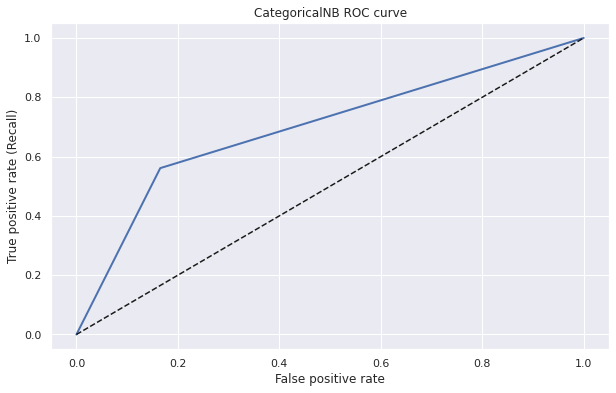

In [ ]:
# Use cross val predict to find y scores for CategoricalNB
# find false positive and true positive rate for CategoricalNB
# Plot ROC curve for CategoricalNB

y_scores_cnb = cross_val_predict(cnb, X_resampled, y_resampled, cv=3)
fpr_cnb, tpr_cnb, thresholds_cnb = roc_curve(y_resampled, y_scores_cnb)

plot_roc_curve(fpr_cnb, tpr_cnb)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.title("CategoricalNB ROC curve")
plt.show()

In [ ]:
# print AUC for CategoricalNB
print(f'CategoricalNB Area under curve (balanced data): {roc_auc_score(y_resampled, y_scores_cnb):.2f}')

CategoricalNB Area under curve (balanced data): 0.70


In [ ]:
# Calculate number of misclassified samples: FP + FN 
# Print accurracy score of CategoricalNB model

count_misclassified_cnb = (y_test != y_pred_cnb).sum()
print("CategoricalNB using balanced data set")
print("=" * 30)
print(f'CategoricalNB Misclassified samples (balanced data): {count_misclassified_cnb}')
accuracy = accuracy_score(y_test, y_pred_cnb)
print(f'CategoricalNB Accuracy Score (balanced data): {accuracy:.2f}')

CategoricalNB using balanced data set
CategoricalNB Misclassified samples (balanced data): 553
CategoricalNB Accuracy Score (balanced data): 0.79


In [ ]:
# Predict test set using GaussianNB model
y_pred_gnb = gnb.predict(X_test)

In [ ]:
# In this model let the negative class be 0 : Not looking for a job change

# And positive class be 1 :  looking for a job change

#                                      Predicted
#  CM displays as               Negative     Positive
#                    Negative     TN            FP
#       Actual       Positive     FN            TP

print(f'GaussianNB Confusion Matrix (balanced data)\n{confusion_matrix(y_test, y_pred_gnb)}')

GaussianNB Confusion Matrix (balanced data)
[[1048 1194]
 [ 106  339]]


In [ ]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

         0.0       0.91      0.47      0.62      2242
         1.0       0.22      0.76      0.34       445

    accuracy                           0.52      2687
   macro avg       0.56      0.61      0.48      2687
weighted avg       0.79      0.52      0.57      2687



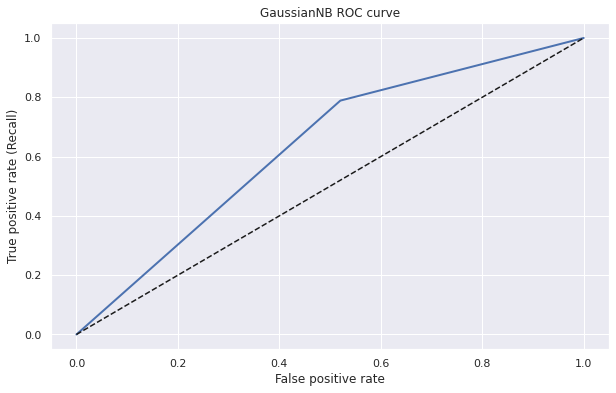

In [ ]:
# Use cross val predict to find y scores for GaussianNB
# find false positive and true positive rate for GaussianNB
# Plot ROC curve for GaussianNB

y_scores_gnb = cross_val_predict(gnb, X_resampled, y_resampled, cv=3, )
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_resampled, y_scores_gnb)

plot_roc_curve(fpr_gnb, tpr_gnb)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.title("GaussianNB ROC curve")
plt.show()

In [ ]:
# print AUC for GaussianNB
print(f'GaussianNB Area under curve (balanced data): {roc_auc_score(y_resampled, y_scores_gnb):.2f}')

GaussianNB Area under curve (balanced data): 0.63


In [ ]:
# Calculate number of misclassified samples: FP + FN 
# Print accurracy score of GaussianNB model

count_misclassified_gnb = (y_test != y_pred_gnb).sum()
print("GaussianNB using balanced data set")
print("=" * 30)
print(f'GaussianNB Misclassified samples (balanced data): {count_misclassified_gnb}')
accuracy = accuracy_score(y_test, y_pred_gnb)
print(f'GaussianNB Accuracy Score (balanced data): {accuracy:.2f}')

GaussianNB using balanced data set
GaussianNB Misclassified samples (balanced data): 1300
GaussianNB Accuracy Score (balanced data): 0.52


# 8.Support Vector Machine
<hr>

  1.Build a support vector machine model using SVC. Use grid search to tune some parameters and then based on that show the best parameters found

2.Test the model and print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification.

In [ ]:
from sklearn.svm import SVC

#SVC tunning
## Search grid for optimal parameters
param_grid = {'C': [0.1,1, 10], 
              'gamma': [1,0.1,0.01,0.001,0.0001], 
              'kernel': ['rbf', 'sigmoid', 'poly']
              } # create list of paraeters you would like to tune. We have already gone thorugh these parameters in our lecture and note

# Grid Search
grid = GridSearchCV(SVC(),param_grid,refit=True, n_jobs = -1)

# fitting the balanced data to the model
grid_results_svc = grid.fit(X_resampled,y_resampled)

In [ ]:
# SVC best parameters
print(grid_results_svc.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
# Define SVC model using Grid Search best parameters 
# fit the balanced data
# Predict test set 

final_model_svc = SVC().set_params(**grid_results_svc.best_params_)
final_model_svc.fit(X_resampled,y_resampled)
y_pred_svc = final_model_svc.predict(X_test)

In [ ]:
SVMC_best = grid_results_svc.best_estimator_

# Best score
grid_results_svc.best_score_

0.8259082217973231

In [ ]:
# In this model let the negative class be 0 : Not looking for a job change

# And positive class be 1 :  looking for a job change

#                                      Predicted
#  CM displays as               Negative     Positive
#                    Negative     TN            FP
#       Actual       Positive     FN            TP

print(f'SVC Confusion Matrix (balanced data)\n{confusion_matrix(y_test, y_pred_svc)}')

SVC Confusion Matrix (balanced data)
[[1898  344]
 [ 210  235]]


In [ ]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

         0.0       0.90      0.85      0.87      2242
         1.0       0.41      0.53      0.46       445

    accuracy                           0.79      2687
   macro avg       0.65      0.69      0.67      2687
weighted avg       0.82      0.79      0.80      2687



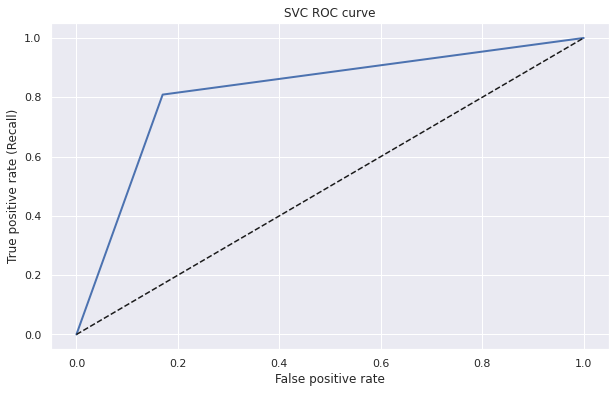

In [ ]:
# Use cross val predict to find y scores for GaussianNB
# find false positive and true positive rate for GaussianNB
# Plot ROC curve for GaussianNB

y_scores_svc = cross_val_predict(final_model_svc, X_resampled, y_resampled, cv=3)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_resampled, y_scores_svc)

plot_roc_curve(fpr_svc, tpr_svc)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.title("SVC ROC curve")
plt.show()

In [ ]:
# print AUC for SVC
print(f'SVC Area under curve (balanced data): {roc_auc_score(y_resampled, y_scores_svc):.2f}')

SVC Area under curve (balanced data): 0.82


In [ ]:
# Calculate number of misclassified samples: FP + FN 
# Print accurracy score of SVC model

count_misclassified_svc = (y_test != y_pred_svc).sum()
print("SVC using balanced data set")
print("=" * 30)
print(f'SVC Misclassified samples (balanced data): {count_misclassified_svc}')
accuracy = accuracy_score(y_test, y_pred_svc)
print(f'SVC Accuracy Score (balanced data): {accuracy:.2f}')

SVC using balanced data set
SVC Misclassified samples (balanced data): 554
SVC Accuracy Score (balanced data): 0.79


# 9. Decision Tree
<hr>

  1.Build a decision tree model using sklearns DecisionTreeClassifier. Use the unbalanced training set, entropy as the criterion. Try with different max_depth (or use grid search). After building model, test it and print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification. Show the decision tree. (you can simply import tree from sklearn and call tree.plot_tree with your model and the call plt.show. At the beginning of this process, use plt.figure to change the figsize)

2.Perform the same tasks as 9.1 with the balanced training set

3.Discuss any difference and also discuss part of the tree of 9.2

In [ ]:
from sklearn.tree import DecisionTreeClassifier

## Search grid for optimal parameters 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
param_grid = {'max_depth': [2,3,5,10], 
              'criterion': ['entropy'], 
              'random_state' : [0, 1]
              } 
# Grid Search
grid_dt_unbalanced = GridSearchCV(DecisionTreeClassifier(),param_grid,refit="AUC", n_jobs = -1, cv = cv, scoring=scoring)

# fitting the unbalanced data to the model
grid_results_dt_unbalanced = grid_dt_unbalanced.fit(X_train,y_train)

In [ ]:
# Grid Search Best Parameters
print(grid_results_dt_unbalanced.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'random_state': 1}


In [ ]:
# Define Decision Tree model using Grid Search best parameters 
# fit the unbalanced data
# Predict test set 

final_model_dt_unbalanced = DecisionTreeClassifier().set_params(**grid_results_dt_unbalanced.best_params_)
final_model_dt_unbalanced.fit(X_train,y_train)
y_pred_dt_unbalanced = final_model_dt_unbalanced.predict(X_test)

In [ ]:
DTC_unbalanced_best = grid_results_dt_unbalanced.best_estimator_

# Best score
grid_results_dt_unbalanced.best_score_

0.7523570564822258

In [ ]:
# In this model let the negative class be 0 : Not looking for a job change

# And positive class be 1 :  looking for a job change

#                                      Predicted
#  CM displays as               Negative     Positive
#                    Negative     TN            FP
#       Actual       Positive     FN            TP

print(f'Decision Tree Confusion Matrix (unbalanced data)\n{confusion_matrix(y_test, y_pred_dt_unbalanced)}')

Decision Tree Confusion Matrix (unbalanced data)
[[2084  158]
 [ 226  219]]


In [ ]:
print(classification_report(y_test, y_pred_dt_unbalanced))

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92      2242
         1.0       0.58      0.49      0.53       445

    accuracy                           0.86      2687
   macro avg       0.74      0.71      0.72      2687
weighted avg       0.85      0.86      0.85      2687



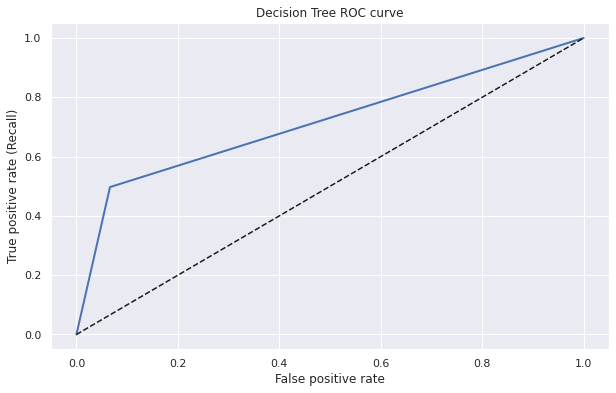

In [ ]:
# Use cross val predict to find y scores for Decision Tree
# find false positive and true positive rate for Decision Tree
# Plot ROC curve for Decision Tree

y_scores_dt_unbalanced = cross_val_predict(final_model_dt_unbalanced, X_train, y_train, cv = 10)
fpr_dt_unbalanced, tpr_dt_unbalanced, thresholds_dt_unbalanced = roc_curve(y_train, y_scores_dt_unbalanced)

plot_roc_curve(fpr_dt_unbalanced, tpr_dt_unbalanced)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.title("Decision Tree ROC curve")
plt.show()

In [ ]:
# print AUC for Decision Tree
print(f'Decision Tree Area under curve (unbalanced data): {roc_auc_score(y_train, y_scores_dt_unbalanced):.2f}')

Decision Tree Area under curve (unbalanced data): 0.72


In [ ]:
# Calculate number of misclassified samples: FP + FN 
# Print accurracy score of Decision Tree

count_misclassified_dt_unbalanced = (y_test != y_pred_dt_unbalanced).sum()
print("Decision Tree using unbalanced Training Set")
print("=" * 30)
print(f'Decision Tree Misclassified samples (unbalanced data): {count_misclassified_dt_unbalanced}')
accuracy = accuracy_score(y_test, y_pred_dt_unbalanced)
print(f'Decision Tree Accuracy Score (unbalanced data): {accuracy:.2f}')

Decision Tree using unbalanced Training Set
Decision Tree Misclassified samples (unbalanced data): 384
Decision Tree Accuracy Score (unbalanced data): 0.86


In [ ]:
from sklearn import tree

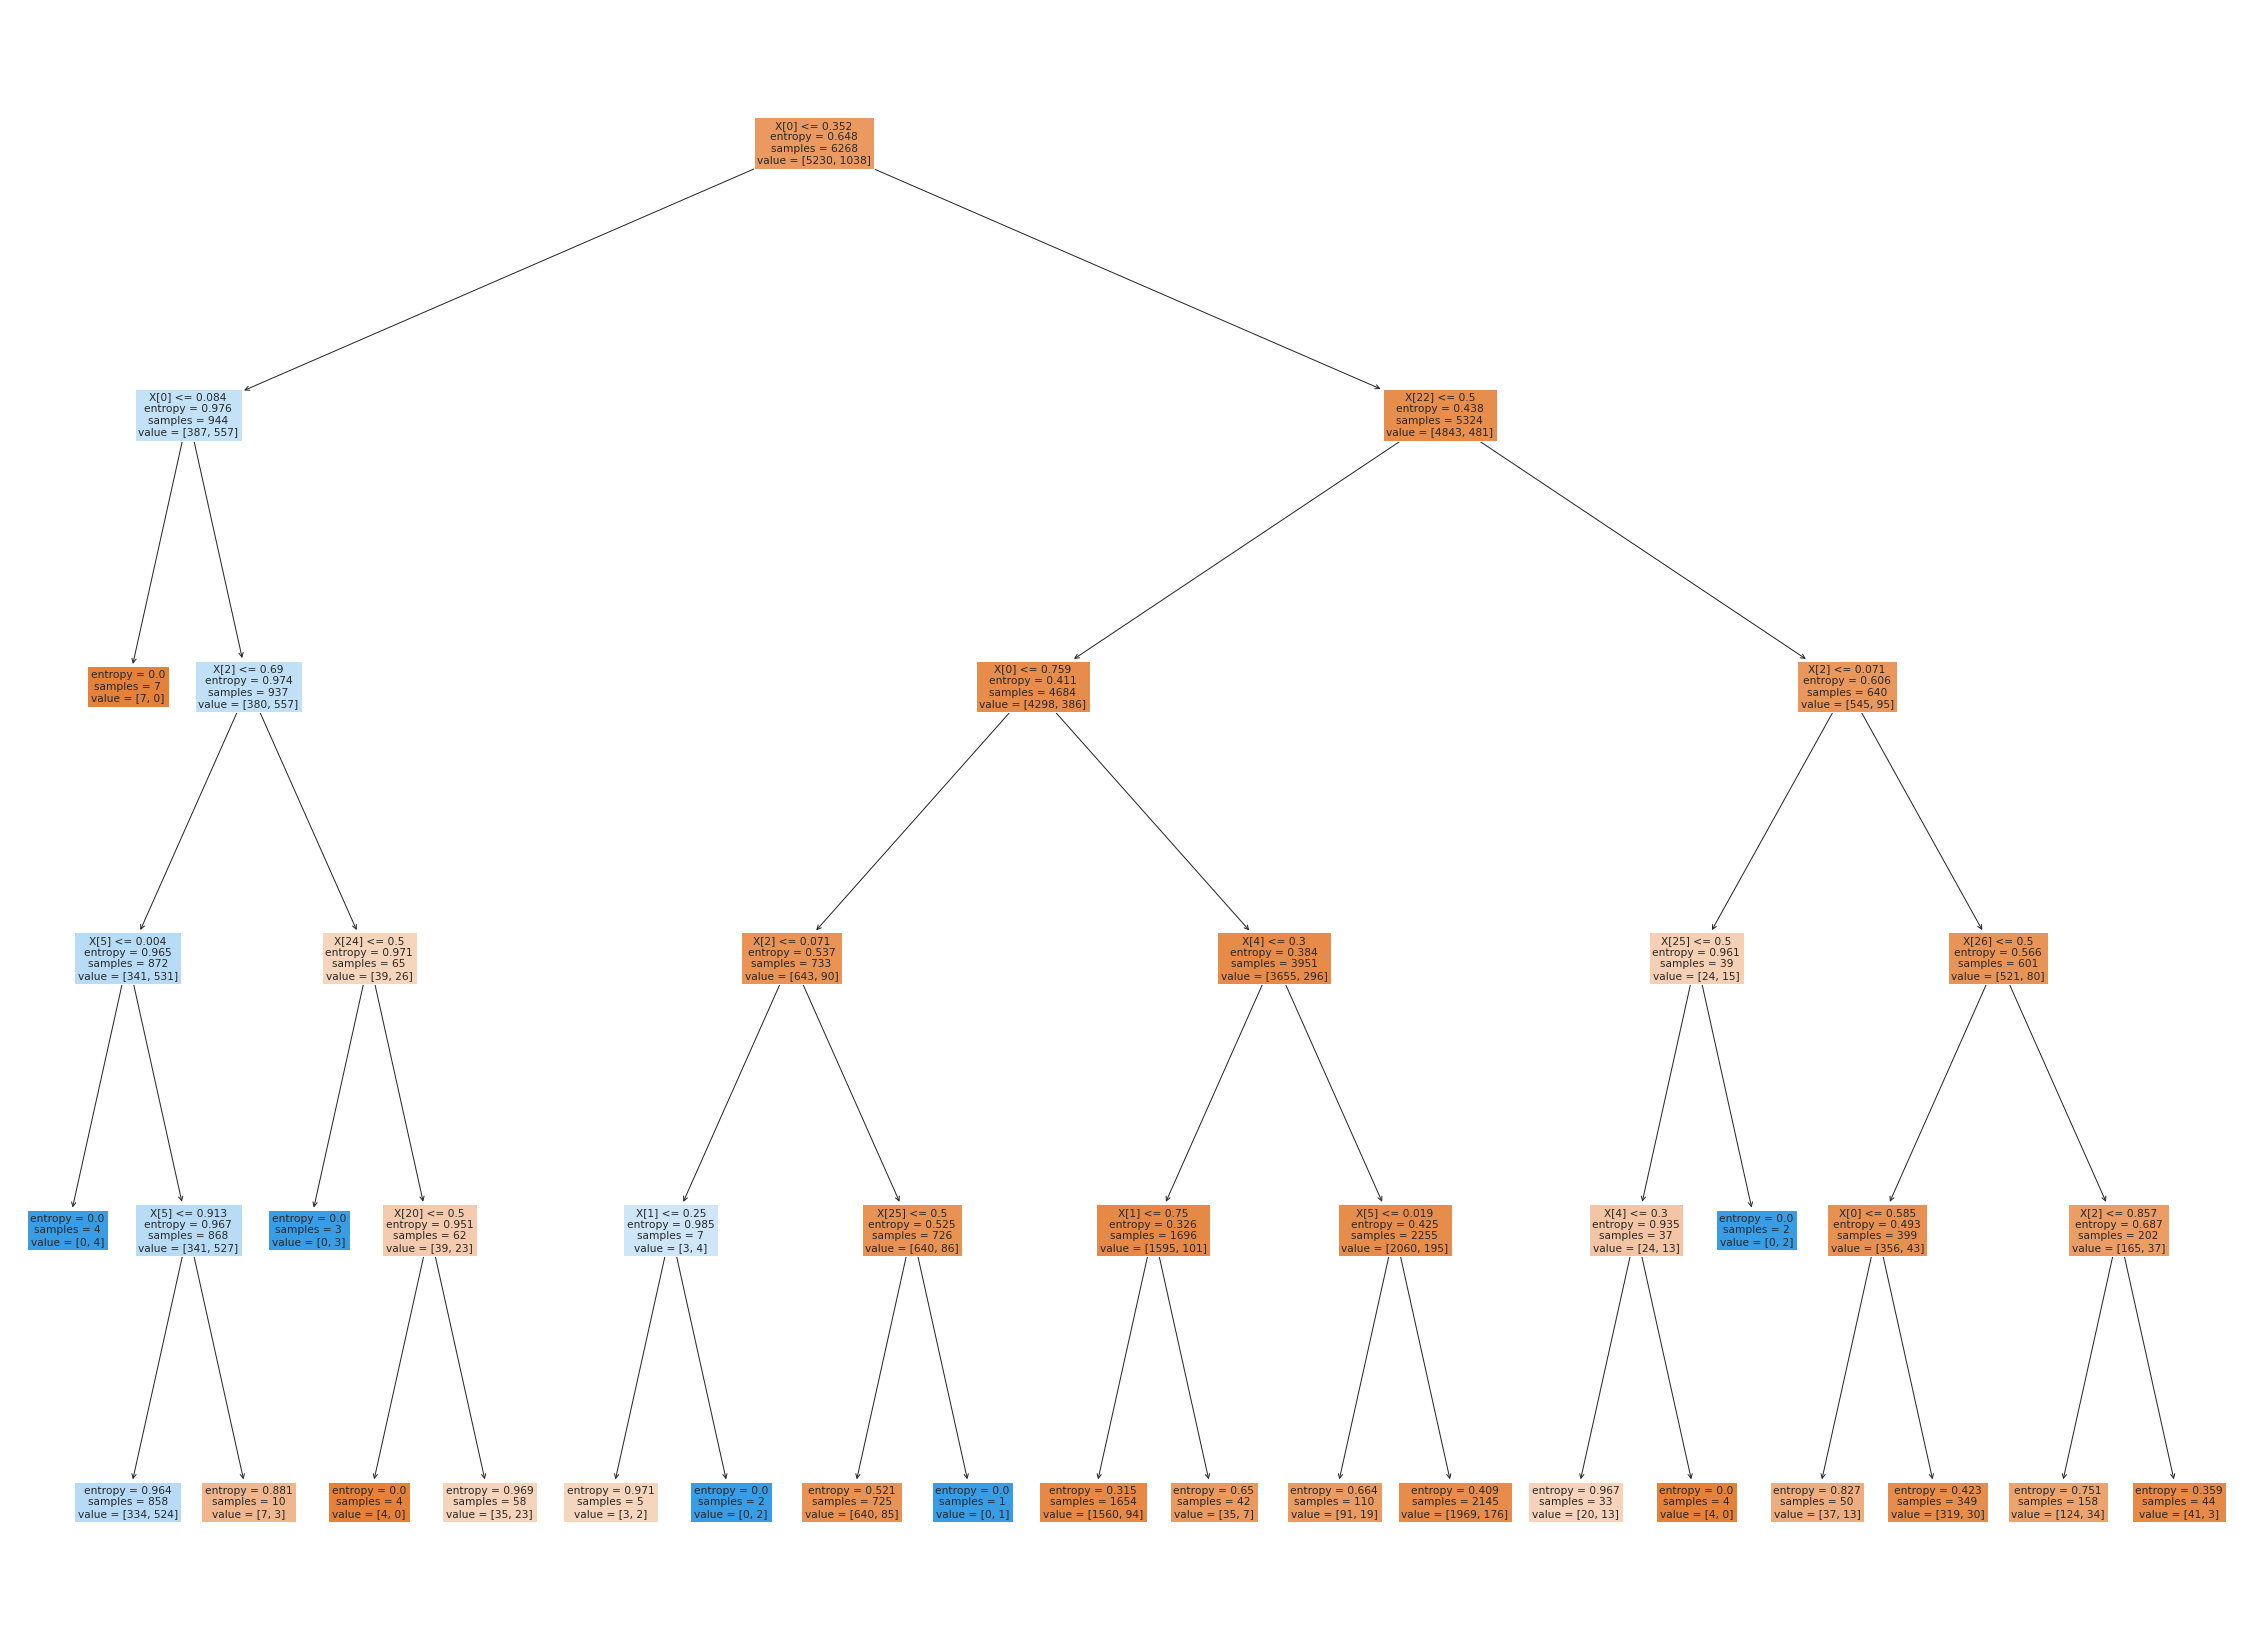

In [ ]:
# Plot Decision Tree
plt.figure(figsize=(40,30))
tree.plot_tree(final_model_dt_unbalanced, filled = True);

In [ ]:

## Search grid for optimal parameters 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
param_grid = {'max_depth': [2,3,5,10], 
              'criterion': ['entropy'], 
              'random_state' : [0, 1]
              } 
# Grid Search
grid_dt_balanced = GridSearchCV(DecisionTreeClassifier(),param_grid,refit="AUC", n_jobs = -1, cv = cv, scoring=scoring)

# fitting the balanced data to the model
grid_results_dt_balanced = grid_dt_balanced.fit(X_resampled,y_resampled)

In [ ]:
# Grid Search Best Parameters
print(grid_results_dt_balanced.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'random_state': 1}


In [ ]:
# Define Decision Tree model using Grid Search best parameters 
# fit the balanced data
# Predict test set 

final_model_dt_balanced = DecisionTreeClassifier().set_params(**grid_results_dt_balanced.best_params_)
final_model_dt_balanced.fit(X_resampled,y_resampled)
y_pred_dt_balanced = final_model_dt_balanced.predict(X_test)

In [ ]:
DTC_balanced_best = grid_results_dt_balanced.best_estimator_

# Best score
grid_results_dt_balanced.best_score_

0.8785526092906665

In [ ]:
# In this model let the negative class be 0 : Not looking for a job change

# And positive class be 1 :  looking for a job change

#                                      Predicted
#  CM displays as               Negative     Positive
#                    Negative     TN            FP
#       Actual       Positive     FN            TP

print(f'Decision Tree Confusion Matrix (balanced data)\n{confusion_matrix(y_test, y_pred_dt_balanced)}')

Decision Tree Confusion Matrix (balanced data)
[[2054  188]
 [ 239  206]]


In [ ]:
print(classification_report(y_test, y_pred_dt_balanced))

              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91      2242
         1.0       0.52      0.46      0.49       445

    accuracy                           0.84      2687
   macro avg       0.71      0.69      0.70      2687
weighted avg       0.83      0.84      0.84      2687



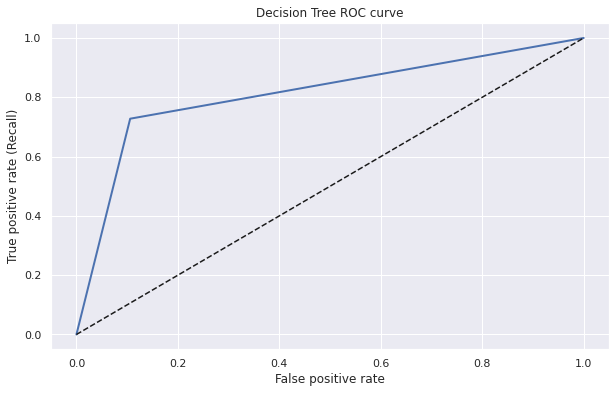

In [ ]:
# Use cross val predict to find y scores for Decision Tree
# find false positive and true positive rate for Decision Tree
# Plot ROC curve for Decision Tree

y_scores_dt_balanced = cross_val_predict(final_model_dt_balanced, X_resampled, y_resampled, cv=3)
fpr_dt_balanced, tpr_dt_balanced, thresholds_dt_balanced = roc_curve(y_resampled, y_scores_dt_balanced)

plot_roc_curve(fpr_dt_balanced, tpr_dt_balanced)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.title("Decision Tree ROC curve")
plt.show()

In [ ]:
# print AUC for Decision Tree
print(f'Decision Tree Area under curve (balanced data): {roc_auc_score(y_resampled, y_scores_dt_balanced):.2f}')

Decision Tree Area under curve (balanced data): 0.81


In [ ]:
# Calculate number of misclassified samples: FP + FN 
# Print accurracy score of Decision Tree

count_misclassified_dt_balanced = (y_test != y_pred_dt_balanced).sum()
print("Decision Tree using balanced Training Set")
print("=" * 30)
print(f'Decision Tree Misclassified samples (balanced data): {count_misclassified_dt_balanced}')
accuracy = accuracy_score(y_test, y_pred_dt_balanced)
print(f'Decision Tree Accuracy Score (balanced data): {accuracy:.2f}')

Decision Tree using balanced Training Set
Decision Tree Misclassified samples (balanced data): 427
Decision Tree Accuracy Score (balanced data): 0.84


In [ ]:
### Figure is really large so clicked the cell to zoom in 

plt.figure(figsize=(300,200))
tree.plot_tree(final_model_dt_balanced, filled = True);

### Discuss any difference and also discuss part of the tree of 9.2
I noticed that the unbalanced set had a more accurate misclassification accuracy then with the balanced set, and the unbalanced set had a higher weighted and unweighted average, accurracy and recall compared to the decision tree using the balacned set.

# 10. Random Forest
<hr>

  1.Use grid search to tune the max_depth, min_samples_leaf, and n_estimators  (helpful link:https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/) [it may take about 5 minutes

2.Print the best estimator

3.train the model. After building the model, test it and print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# RFC Parameters tunning 
## Search grid for optimal parameters 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
param_grid = {'n_estimators': [10,25,30,50,100,200], 
              'min_samples_leaf' : [5,10,20,50,100,200], 
              'max_depth' : [2,3,5,10]
              } 
# Grid Search              
grid_rf = GridSearchCV(RandomForestClassifier(),param_grid,refit="AUC", n_jobs = -1, cv = cv, scoring=scoring)

# fitting the balanced data to the model
grid_results_rf = grid_rf.fit(X_resampled, y_resampled)

In [ ]:
# Grid Search Best Parameters
print(grid_results_rf.best_params_)

{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 200}


In [ ]:
# Define Random Forest model using Grid Search best parameters 
# fit the balanced data
# Predict test set 

final_model_rf = RandomForestClassifier().set_params(**grid_results_rf.best_params_)
final_model_rf.fit(X_resampled,y_resampled)
y_pred_rf = final_model_rf.predict(X_test)

In [ ]:
RFC_best = grid_results_rf.best_estimator_

# Best score
grid_results_rf.best_score_

0.9078289078428003

In [ ]:
# In this model let the negative class be 0 : Not looking for a job change

# And positive class be 1 :  looking for a job change

#                                      Predicted
#  CM displays as               Negative     Positive
#                    Negative     TN            FP
#       Actual       Positive     FN            TP

print(f'Random Forest Confusion Matrix (balanced data)\n{confusion_matrix(y_test, y_pred_rf)}')

Random Forest Confusion Matrix (balanced data)
[[2063  179]
 [ 201  244]]


In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92      2242
         1.0       0.58      0.55      0.56       445

    accuracy                           0.86      2687
   macro avg       0.74      0.73      0.74      2687
weighted avg       0.86      0.86      0.86      2687



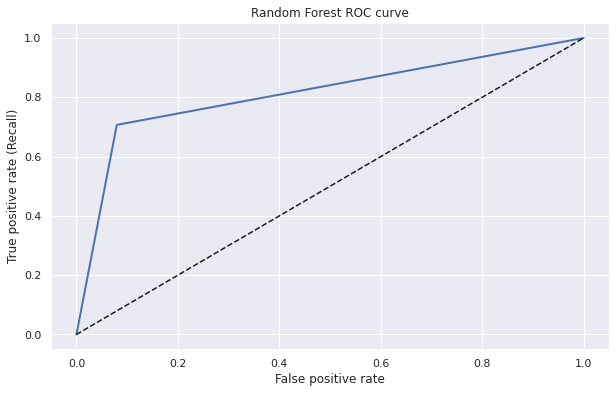

In [ ]:
# Use cross val predict to find y scores for Random Forest
# find false positive and true positive rate for Random Forest
# Plot ROC curve for Random Forest

y_scores_rf = cross_val_predict(final_model_rf, X_resampled, y_resampled, cv=3)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_resampled, y_scores_rf)

plot_roc_curve(fpr_rf, tpr_rf)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.title("Random Forest ROC curve")
plt.show()

In [ ]:
# print AUC for Random Forest
print(f'Random Forest Area under curve (balanced data): {roc_auc_score(y_resampled, y_scores_rf):.2f}')

Random Forest Area under curve (balanced data): 0.81


In [ ]:
# Calculate number of misclassified samples: FP + FN 
# Print accurracy score of Random Forest

count_misclassified_rf = (y_test != y_pred_rf).sum()
print("Random Forest using balanced Training Set")
print("=" * 30)
print(f'Random Forest Misclassified samples (balanced data): {count_misclassified_rf}')
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy Score (balanced data): {accuracy:.2f}')

Random Forest using balanced Training Set
Random Forest Misclassified samples (balanced data): 380
Random Forest Accuracy Score (balanced data): 0.86


# 11. Boosting Algorithms
<hr>

  1.Train an AdaBoostClassifier model with some manual/grid search-based parameters and then test it and then print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification.

2.Do the same for Gradient BoostingClassifier



In [ ]:
from sklearn.ensemble import AdaBoostClassifier #For Classification

# Adaboost tunning
## Search grid for optimal parameters 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
param_grid = {'n_estimators': [10,25,30,50,100,200], 
              'learning_rate' : [0.01, 0.1, 1], 
              'random_state' : [0, 1]
              }
# Grid Search               
grid_clf = GridSearchCV(AdaBoostClassifier(),param_grid,refit="AUC", n_jobs = -1, cv = cv, scoring=scoring)

# fitting the balanced data to the model
grid_results_clf = grid_clf.fit(X_resampled, y_resampled)

In [ ]:
# Grid Search Best Parameters
print(grid_results_clf.best_params_)

{'learning_rate': 1, 'n_estimators': 200, 'random_state': 0}


In [ ]:
# Define AdaBoostClassifier model using Grid Search best parameters 
# fit the balanced data
# Predict test set 

final_model_clf = AdaBoostClassifier().set_params(**grid_results_clf.best_params_)
final_model_clf.fit(X_resampled,y_resampled)
y_pred_clf = final_model_clf.predict(X_test)

In [ ]:
ada_best = grid_results_clf.best_estimator_

# Best score
grid_results_clf.best_score_

0.9282756124579111

In [ ]:
# In this model let the negative class be 0 : Not looking for a job change

# And positive class be 1 :  looking for a job change

#                                      Predicted
#  CM displays as               Negative     Positive
#                    Negative     TN            FP
#       Actual       Positive     FN            TP

print(f'AdaBoost Confusion Matrix (balanced data)\n{confusion_matrix(y_test, y_pred_clf)}')

AdaBoost Confusion Matrix (balanced data)
[[2068  174]
 [ 207  238]]


In [ ]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92      2242
         1.0       0.58      0.53      0.56       445

    accuracy                           0.86      2687
   macro avg       0.74      0.73      0.74      2687
weighted avg       0.85      0.86      0.86      2687



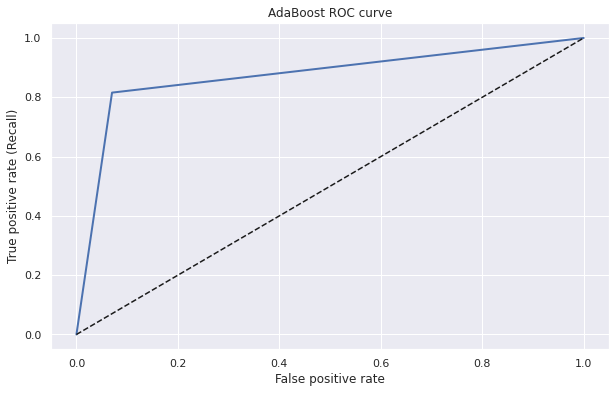

In [ ]:
# Use cross val predict to find y scores for AdaBoostClassifier
# find false positive and true positive rate for AdaBoostClassifier
# Plot ROC curve for AdaBoostClassifier

y_scores_clf = cross_val_predict(final_model_clf, X_resampled, y_resampled, cv=3)
fpr_clf, tpr_clf, thresholds_clf = roc_curve(y_resampled, y_scores_clf)

plot_roc_curve(fpr_clf, tpr_clf)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.title("AdaBoost ROC curve")
plt.show()

In [ ]:
# print AUC for AdaBoost
print(f'AdaBoost Area under curve (balanced data): {roc_auc_score(y_resampled, y_scores_clf):.2f}')

AdaBoost Area under curve (balanced data): 0.87


In [ ]:
# Calculate number of misclassified samples: FP + FN 
# Print accurracy score of AdaBoostClassifier

count_misclassified_clf = (y_test != y_pred_clf).sum()
print("AdaBoostClassifier using balanced Training Set")
print("=" * 30)
print(f'AdaBoostClassifier Misclassified samples (balanced data): {count_misclassified_clf}')
accuracy = accuracy_score(y_test, y_pred_clf)
print(f'AdaBoostClassifier Accuracy Score (balanced data): {accuracy:.2f}')

AdaBoostClassifier using balanced Training Set
AdaBoostClassifier Misclassified samples (balanced data): 381
AdaBoostClassifier Accuracy Score (balanced data): 0.86


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient boosting tunning
## Search grid for optimal parameters 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
param_grid = {'loss': ['deviance', 'exponential'], 
              'max_depth': [3,5,10], 
              'n_estimators': [10,50,100,200], 
              'learning_rate' : [0.01, 0.1]
              } 
# Grid Search               
grid_gbc = GridSearchCV(GradientBoostingClassifier(),param_grid,refit="AUC", n_jobs = -1, cv = cv, scoring=scoring)

# fitting the balanced data to the model
grid_results_gbc = grid_gbc.fit(X_resampled, y_resampled)

In [ ]:
# Grid Search Best Parameters
print(grid_results_gbc.best_params_)

{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 10, 'n_estimators': 200}


In [ ]:
# Define GradientBoostingClassifier model using Grid Search best parameters 
# fit the balanced data
# Predict test set 

final_model_gbc = GradientBoostingClassifier().set_params(**grid_results_gbc.best_params_)
final_model_gbc.fit(X_resampled,y_resampled)
y_pred_gbc = final_model_gbc.predict(X_test)

In [ ]:
GBC_best = grid_results_gbc.best_estimator_

# Best score
grid_results_gbc.best_score_

0.9562257871499305

In [ ]:
# In this model let the negative class be 0 : Not looking for a job change

# And positive class be 1 :  looking for a job change

#                                      Predicted
#  CM displays as               Negative     Positive
#                    Negative     TN            FP
#       Actual       Positive     FN            TP

print(f'GradientBoostingClassifier Confusion Matrix (balanced data)\n{confusion_matrix(y_test, y_pred_gbc)}')

GradientBoostingClassifier Confusion Matrix (balanced data)
[[2101  141]
 [ 276  169]]


In [ ]:
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      2242
         1.0       0.55      0.38      0.45       445

    accuracy                           0.84      2687
   macro avg       0.71      0.66      0.68      2687
weighted avg       0.83      0.84      0.83      2687



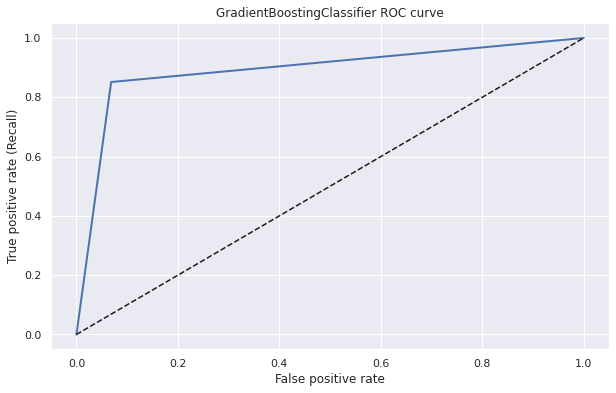

In [ ]:
# Use cross val predict to find y scores for GradientBoostingClassifier
# find false positive and true positive rate for GradientBoostingClassifier
# Plot ROC curve for GradientBoostingClassifier

y_scores_gbc = cross_val_predict(final_model_gbc, X_resampled, y_resampled, cv=3)
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_resampled, y_scores_gbc)

plot_roc_curve(fpr_gbc, tpr_gbc)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.title("GradientBoostingClassifier ROC curve")
plt.show()

In [ ]:
# print AUC for GradientBoostingClassifier
print(f'GradientBoostingClassifier Area under curve (balanced data): {roc_auc_score(y_resampled, y_scores_gbc):.2f}')

GradientBoostingClassifier Area under curve (balanced data): 0.89


In [ ]:
# Calculate number of misclassified samples: FP + FN 
# Print accurracy score of Random Forest

count_misclassified_gbc = (y_test != y_pred_gbc).sum()
print("GradientBoosting using balanced Training Set")
print("=" * 30)
print(f'GradientBoostingClassifier Misclassified samples (balanced data): {count_misclassified_gbc}')
accuracy = accuracy_score(y_test, y_pred_gbc)
print(f'GradientBoostingClassifier Accuracy Score (balanced data): {accuracy:.2f}')

GradientBoosting using balanced Training Set
GradientBoostingClassifier Misclassified samples (balanced data): 417
GradientBoostingClassifier Accuracy Score (balanced data): 0.84


# 12.Finally, briefly discuss your finding such as which model could be most suitable for this given scenario and what could be your future work based on this experiment.
<hr>



After performing the experiment on the models here are the conclusions: 

Best Models
1.   Adaboost Classifier
2.   Random Forest Classifier
3.   GradientBoosting Classifier

* So this is a bad model to predict job changing noted by the low precision, recall, and F1 scores in the classification report of each model but good at predicting whether stays at the company after training since on the flip side the scores were high for the negative class of people not changing jobs after training.

* Though Adaboost and Random Forest have very close results, Adaboost is slightly better due to the fact the AUC for the adaboost roc curve is closer to 1 compared to the random forest roc curve making the adaboost classifier closer to a perfect classifier than random forest and adaboost grid search best score is slightly higher than Random Forest Classifier best score. 

* GradientBoostingClassifier has highest grid search best score but has more misclassified samples compared to Adaboost Classifier and Random Forest Classifier.

* Based on this experiment my future work would make sure my features were not skewed this city development and training hours were skewed distributions and I would use better features that correlate more with the positive class of the target, candidates switching jobs after training.

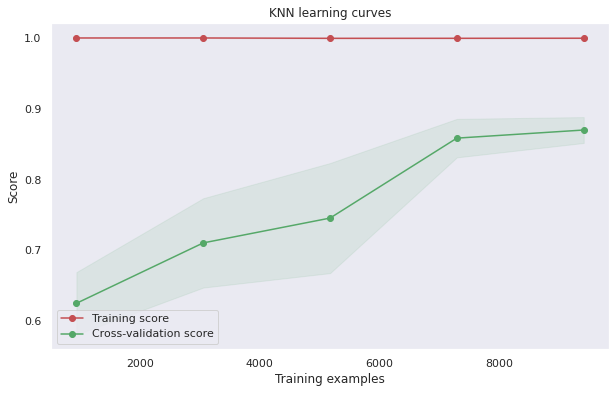

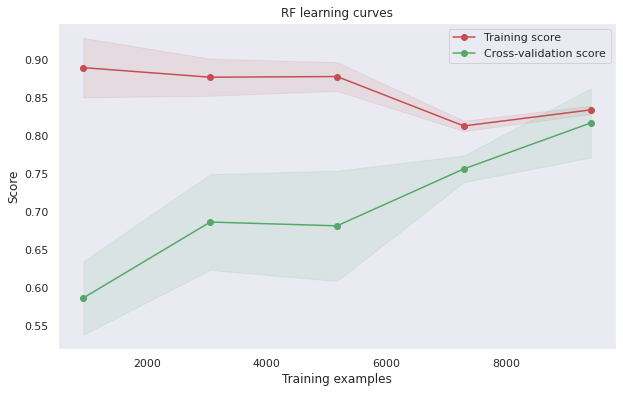

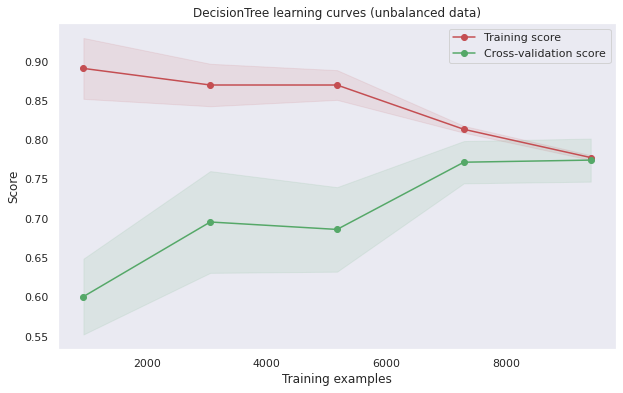

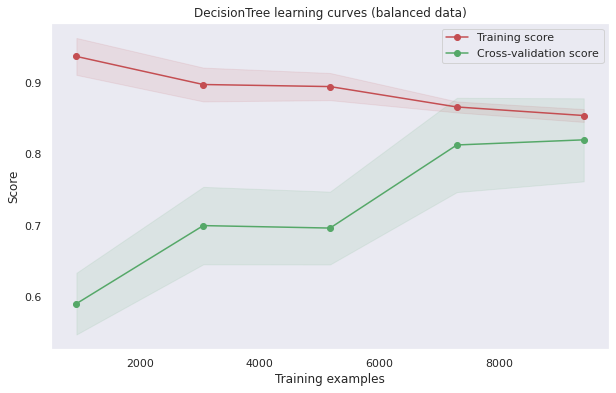

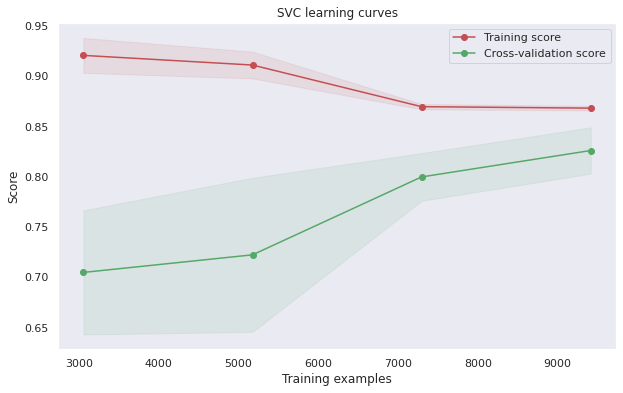

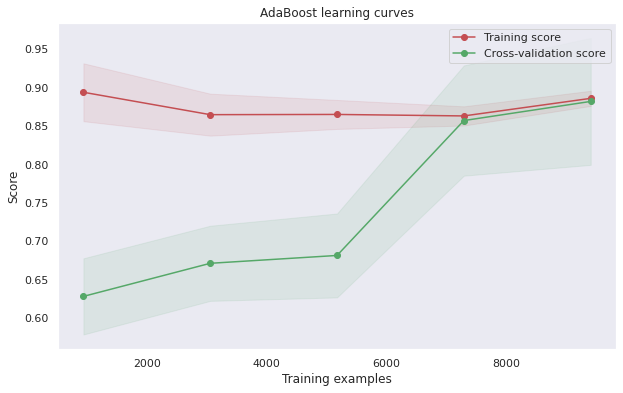

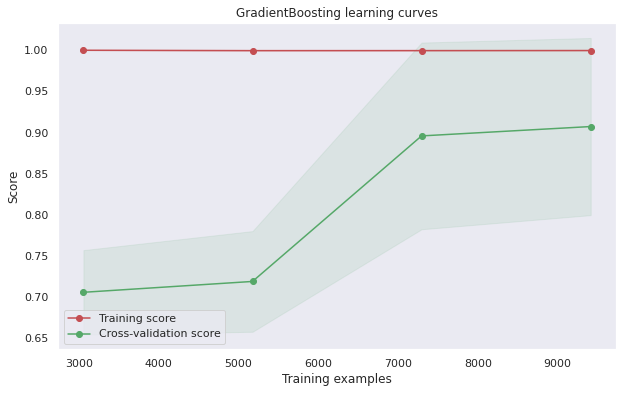

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
grid_search
g = plot_learning_curve(grid_results.best_estimator_,"KNN learning curves",X_resampled,y_resampled,cv=kfold_)
g = plot_learning_curve(grid_results_rf.best_estimator_,"RF learning curves",X_resampled,y_resampled,cv=kfold_)
g = plot_learning_curve(grid_results_dt_unbalanced.best_estimator_,"DecisionTree learning curves (unbalanced data)",X_resampled,y_resampled,cv=kfold_)
g = plot_learning_curve(grid_results_dt_balanced.best_estimator_,"DecisionTree learning curves (balanced data)",X_resampled,y_resampled,cv=kfold_)
g = plot_learning_curve(grid_results_svc.best_estimator_,"SVC learning curves",X_resampled,y_resampled,cv=kfold_)
g = plot_learning_curve(grid_results_clf.best_estimator_,"AdaBoost learning curves",X_resampled,y_resampled,cv=kfold_)
g = plot_learning_curve(grid_results_gbc.best_estimator_,"GradientBoosting learning curves",X_resampled,y_resampled,cv=kfold_)